# Problem Statement:
- Help No-Churn with their use cases with ML
1. Understanding the variables that are influencing the customers 
   to migrate.
2. Creating Churn risk scores that can be indicative to drive 
   retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values 
   YES(1) or NO(0) so that email campaigns with lucrative offers 
   can be targeted to Churn YES customers help to identify possible CHURN-FLAG YES customers and provide more attention in customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority for quick resolutions any questions they may have etc.

In [1]:
# !pip install catboost

In [2]:
#!pip install -U matplotlib


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score



from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Domain Analysis:



1. **State:** Represents the geographical location (state) where the customer resides, providing insights into regional demographics and market dynamics.

2. **Account Length:** Indicates the duration of time a customer has been subscribed to the telecom service, reflecting loyalty and potential for long-term customer relationships.

3. **Area Code:** Denotes the area code associated with the customer's phone number, offering information about regional telecommunications infrastructure and service coverage.

4. **Phone:** Unique identifier for each customer's phone number, facilitating individualized customer communication and tracking.

5. **International Plan:** Indicates whether the customer has subscribed to an international calling plan, influencing revenue streams and customer segmentation based on global communication needs.

6. **VMail Plan:** Flags whether the customer has a voicemail plan, impacting service offerings and customer communication preferences.

7. **VMail Message:** Quantifies the number of voicemail messages a customer has, reflecting engagement with voicemail services and potential for personalized outreach.

8. **Day Mins:** Total minutes of daytime usage by the customer, crucial for understanding usage patterns and optimizing tariff plans for daytime calling.

9. **Day Calls:** Total number of calls made by the customer during the day, indicating call frequency and potential for upselling additional services.

10. **Day Charge:** Total charges incurred for daytime usage, influencing pricing strategies and revenue generation from daytime calling.

11. **Eve Mins:** Total minutes of evening usage by the customer, informing service planning and resource allocation for evening hours.

12. **Eve Calls:** Total number of calls made by the customer during the evening, reflecting customer engagement and preferences during evening hours.

13. **Eve Charge:** Total charges incurred for evening usage, contributing to revenue streams and pricing models for evening calling.

14. **Night Mins:** Total minutes of nighttime usage by the customer, guiding network optimization and service quality enhancements for nighttime operations.

15. **Night Calls:** Total number of calls made by the customer during the night, indicating usage patterns and potential for service improvements during off-peak hours.

16. **Night Charge:** Total charges incurred for nighttime usage, contributing to revenue calculations and pricing strategies for nighttime services.

17. **International Mins:** Total minutes of international calling by the customer, influencing international service offerings and pricing structures for global communication.

18. **International calls:** Total number of international calls made by the customer, reflecting international communication needs and potential for targeted international service promotions.

19. **International Charge:** Total charges incurred for international calling, contributing to revenue from international services and tariff optimization for global connectivity.

20. **CustServ Calls:** Total number of customer service calls made by the customer, indicating service satisfaction levels and opportunities for service improvement and customer retention efforts.

21. **Churn:** Binary indicator of whether the customer has churned (switched to a competitor), crucial for churn prediction modeling and proactive customer retention strategies.

In [5]:
df = pd.read_csv('churn.csv')

In [6]:
pd.set_option('display.max_column',None)
df.head()

State  Account Length  Area Code      Phone International_Plan Vmail_Plan  \
0    KS             128        415   382-4657                 no        yes   
1    OH             107        415   371-7191                 no        yes   
2    NJ             137        415   358-1921                 no         no   
3    OH              84        408   375-9999                yes         no   
4    OK              75        415   330-6626                yes         no   

   Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0             25     265.1        110       45.07     197.4         99   
1             26     161.6        123       27.47     195.5        103   
2              0     243.4        114       41.38     121.2        110   
3              0     299.4         71       50.90      61.9         88   
4              0     166.7        113       28.34     148.3        122   

   Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0       16.78       244.7           91         11.01                10.0   
1       16.62       254.4          103         11.45                13.7   
2       10.30       162.6          104          7.32                12.2   
3        5.26       196.9           89          8.86                 6.6   
4       12.61       186.9          121          8.41                10.1   

   International_calls  International_Charge   CustServ_Calls   Churn  
0                    3                   2.70               1   False  
1                    3                   3.70               1   False  
2                    5                   3.29               0   False  
3                    7                   1.78               2   False  
4                    3                   2.73               3   False

In [7]:
df.tail()

State  Account Length  Area Code      Phone International_Plan  \
4612    NY              57        510   345-7512                 no   
4613    NM             177        408   343-6820                 no   
4614    VT              67        408   338-4794                 no   
4615    MI              98        415   355-8388                 no   
4616    IN             140        415   409-6884                 no   

     Vmail_Plan  Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  \
4612        yes             25     144.0         81       24.48     187.2   
4613        yes             29     189.0         91       32.13     303.1   
4614        yes             33     127.5        126       21.68     296.1   
4615        yes             23     168.9         98       28.71     226.3   
4616         no              0     204.7        100       34.80     126.8   

      Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
4612        112       15.91       158.6          122          7.14   
4613         96       25.76       163.6          116          7.36   
4614        129       25.17       200.9           91          9.04   
4615        117       19.24       165.5           96          7.45   
4616        107       10.78       202.8          115          9.13   

      International_Mins  International_calls  International_Charge   \
4612                 8.5                    6                   2.30   
4613                15.7                    1                   4.24   
4614                13.0                    3                   3.51   
4615                14.3                    3                   3.86   
4616                12.1                    4                   3.27   

      CustServ_Calls   Churn  
4612               3   False  
4613               3   False  
4614               1   False  
4615               0   False  
4616               2   False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  4617 non-null   object 
 1   Account Length         4617 non-null   int64  
 2   Area Code              4617 non-null   int64  
 3   Phone                  4617 non-null   object 
 4   International_Plan     4617 non-null   object 
 5   Vmail_Plan             4617 non-null   object 
 6   Vmail_Message          4617 non-null   int64  
 7   Day_Mins               4617 non-null   float64
 8   Day_Calls              4617 non-null   int64  
 9   Day_Charge             4617 non-null   float64
 10  Eve_Mins               4617 non-null   float64
 11  Eve_Calls              4617 non-null   int64  
 12  Eve_Charge             4617 non-null   float64
 13  Night_Mins             4617 non-null   float64
 14  Night_Calls            4617 non-null   int64  
 15  Nigh

In [9]:
df.shape

(4617, 21)

In [10]:
df.size

96957

In [11]:
df.describe()

Account Length    Area Code  Vmail_Message     Day_Mins    Day_Calls  \
count     4617.000000  4617.000000    4617.000000  4617.000000  4617.000000   
mean       100.645224   437.046350       7.849903   180.447152   100.054364   
std         39.597194    42.288212      13.592333    53.983540    19.883027   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        100.000000   415.000000       0.000000   180.000000   100.000000   
75%        127.000000   510.000000      17.000000   216.800000   113.000000   
max        243.000000   510.000000      51.000000   351.500000   165.000000   

        Day_Charge     Eve_Mins    Eve_Calls   Eve_Charge   Night_Mins  \
count  4617.000000  4617.000000  4617.000000  4617.000000  4617.000000   
mean     30.676576   200.429088   100.179770    17.036703   200.623933   
std       9.177145    50.557001    19.821314     4.297332    50.543616   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.430000   165.900000    87.000000    14.100000   167.100000   
50%      30.600000   200.800000   101.000000    17.070000   200.800000   
75%      36.860000   234.000000   114.000000    19.890000   234.900000   
max      59.760000   363.700000   170.000000    30.910000   395.000000   

       Night_Calls  Night_Charge  International_Mins  International_calls  \
count  4617.000000   4617.000000         4617.000000          4617.000000   
mean     99.944120      9.028185           10.279294             4.433831   
std      19.935053      2.274488            2.757361             2.457615   
min      12.000000      1.040000            0.000000             0.000000   
25%      87.000000      7.520000            8.600000             3.000000   
50%     100.000000      9.040000           10.300000             4.000000   
75%     113.000000     10.570000           12.100000             6.000000   
max     175.000000     17.770000           20.000000            20.000000   

       International_Charge   CustServ_Calls  
count            4617.000000     4617.000000  
mean                2.775926        1.567035  
std                 0.744413        1.307019  
min                 0.000000        0.000000  
25%                 2.320000        1.000000  
50%                 2.780000        1.000000  
75%                 3.270000        2.000000  
max                 5.400000        9.000000

Here are some insights from the provided `df.describe()` output:

1. **Account Length:**
   - The average account length is approximately 100.6 length, with a standard deviation of 39.6 length.
   - Account lengths range from 1 month to a maximum of 243 months.

2. **Area Code:**
   - Area codes range from 408 to 510.
   - Most customers seem to have area code 415, 408, or 510.

3. **Voicemail Messages:**
   - On average, customers receive around 7.85 voicemail messages.
   - There is a wide range in the number of voicemail messages, from 0 to a maximum of 51.

4. **Daytime Minutes (Day_Mins):**
   - The average number of daytime minutes is approximately 180.4, with a standard deviation of 53.98.
   - Daytime minutes range from 0 to a maximum of 351.5 minutes.

5. **Daytime Calls (Day_Calls):**
   - The average number of daytime calls is approximately 100.1, with a standard deviation of 19.88.
   - Daytime calls range from 0 to a maximum of 165 calls.

6. **Daytime Charge (Day_Charge):**
   - The average daytime charge is approximately $30.68, with a standard deviation of $9.18.
   - Daytime charges range from $0 to a maximum of $59.76.

7. **Evening Minutes (Eve_Mins), Evening Calls (Eve_Calls), and Evening Charge (Eve_Charge):**
   - Similar statistics as daytime metrics but for evening usage.

8. **Nighttime Minutes (Night_Mins), Nighttime Calls (Night_Calls), and Nighttime Charge (Night_Charge):**
   - Similar statistics as daytime metrics but for nighttime usage.

9. **International Minutes (International_Mins), International Calls (International_calls), and International Charge (International_Charge):**
   - Similar statistics as daytime metrics but for international usage.

10. **Customer Service Calls (CustServ_Calls):**
    - On average, customers make approximately 1.57 customer service calls, with a standard deviation of 1.31.
    - Most customers seem to make 0 to 2 customer service calls, but there are outliers with up to 9 calls.



In [12]:
df.describe(include = 'O')

State      Phone International_Plan Vmail_Plan   Churn
count   4617       4617               4617       4617    4617
unique    51       4617                  2          2       2
top       WV   382-4657                 no         no   False
freq     149          1               4171       3381    3961

In [13]:
df.sample(5)

State  Account Length  Area Code      Phone International_Plan  \
4322    NV             138        408   367-8176                 no   
2117    WY             111        415   386-7118                 no   
2665    FL              85        408   347-2951                yes   
1286    IL             107        415   390-2755                 no   
3622    WV              78        510   402-3033                 no   

     Vmail_Plan  Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  \
4322         no              0     180.5         82       30.69     242.4   
2117         no              0     222.2         96       37.77     162.5   
2665         no              0     116.2         86       19.75     229.7   
1286        yes             14     114.3        132       19.43     199.8   
3622        yes             26     189.0         98       32.13     191.7   

      Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
4322        103       20.60       244.4           89         11.00   
2117        111       13.81       184.9          120          8.32   
2665        127       19.52       204.2          109          9.19   
1286         91       16.98       194.7           74          8.76   
3622         67       16.29       217.0           68          9.76   

      International_Mins  International_calls  International_Charge   \
4322                10.3                    7                   2.78   
2117                11.9                    7                   3.21   
2665                10.1                    3                   2.73   
1286                 7.5                    8                   2.03   
3622                11.3                    3                   3.05   

      CustServ_Calls   Churn  
4322               2   False  
2117               4   False  
2665               3   False  
1286               1   False  
3622               0   False

In [14]:
print("Features names :\n",df.columns.values)

Features names :
 ['State' 'Account Length' 'Area Code' 'Phone' 'International_Plan'
 'Vmail_Plan' 'Vmail_Message' 'Day_Mins' 'Day_Calls' 'Day_Charge'
 'Eve_Mins' 'Eve_Calls' 'Eve_Charge' 'Night_Mins' 'Night_Calls'
 'Night_Charge' 'International_Mins' 'International_calls'
 'International_Charge ' 'CustServ_Calls' 'Churn']


In [15]:
# unique columns for unique values categorical variables:
unique_category = []
for column in df.columns:
    if df[column].dtypes == object and len(df[column].unique()) <= 50:
        unique_category.append(column)
        print(f"{column} : {df[column].unique()}")
        print(f"{column}: \n{df[column].value_counts()}")
        print("==="*10)

International_Plan : [' no' ' yes']
International_Plan: 
 no     4171
 yes     446
Name: International_Plan, dtype: int64
Vmail_Plan : [' yes' ' no']
Vmail_Plan: 
 no     3381
 yes    1236
Name: Vmail_Plan, dtype: int64
Churn : [' False' ' True']
Churn: 
 False    3961
 True      656
Name: Churn, dtype: int64


In [16]:
# unique_values of numerical features:
unique_numerical = []

for column in df.columns:
    if df[column].dtypes == 'int64' or df[column].dtypes == 'float64':
        if len(df[column].unique()):
            unique_numerical.append(column)
            print(f"{column}:\n{df[column].unique()}")
            print("=="*10)

Account Length:
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221 187  14 238 216
 222 233]
Area Code:
[415 408 510]
Vmail_Message:
[25 26  0 24 37 27 33 39 30 41 28 34 46 29 35 21 32 42 36 

In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().any()

State                    False
Account Length           False
Area Code                False
Phone                    False
International_Plan       False
Vmail_Plan               False
Vmail_Message            False
Day_Mins                 False
Day_Calls                False
Day_Charge               False
Eve_Mins                 False
Eve_Calls                False
Eve_Charge               False
Night_Mins               False
Night_Calls              False
Night_Charge             False
International_Mins       False
International_calls      False
International_Charge     False
CustServ_Calls           False
Churn                    False
dtype: bool

In [19]:
df.dtypes

State                     object
Account Length             int64
Area Code                  int64
Phone                     object
International_Plan        object
Vmail_Plan                object
Vmail_Message              int64
Day_Mins                 float64
Day_Calls                  int64
Day_Charge               float64
Eve_Mins                 float64
Eve_Calls                  int64
Eve_Charge               float64
Night_Mins               float64
Night_Calls                int64
Night_Charge             float64
International_Mins       float64
International_calls        int64
International_Charge     float64
CustServ_Calls             int64
Churn                     object
dtype: object

In [20]:
# Standardize phone number format (e.g., remove dashes)
# df['Phone'] = df['Phone'].str.replace('-', '')

In [21]:
df.head()

State  Account Length  Area Code      Phone International_Plan Vmail_Plan  \
0    KS             128        415   382-4657                 no        yes   
1    OH             107        415   371-7191                 no        yes   
2    NJ             137        415   358-1921                 no         no   
3    OH              84        408   375-9999                yes         no   
4    OK              75        415   330-6626                yes         no   

   Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0             25     265.1        110       45.07     197.4         99   
1             26     161.6        123       27.47     195.5        103   
2              0     243.4        114       41.38     121.2        110   
3              0     299.4         71       50.90      61.9         88   
4              0     166.7        113       28.34     148.3        122   

   Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0       16.78       244.7           91         11.01                10.0   
1       16.62       254.4          103         11.45                13.7   
2       10.30       162.6          104          7.32                12.2   
3        5.26       196.9           89          8.86                 6.6   
4       12.61       186.9          121          8.41                10.1   

   International_calls  International_Charge   CustServ_Calls   Churn  
0                    3                   2.70               1   False  
1                    3                   3.70               1   False  
2                    5                   3.29               0   False  
3                    7                   1.78               2   False  
4                    3                   2.73               3   False

In [22]:
print("Features names :\n",df.columns.values)

Features names :
 ['State' 'Account Length' 'Area Code' 'Phone' 'International_Plan'
 'Vmail_Plan' 'Vmail_Message' 'Day_Mins' 'Day_Calls' 'Day_Charge'
 'Eve_Mins' 'Eve_Calls' 'Eve_Charge' 'Night_Mins' 'Night_Calls'
 'Night_Charge' 'International_Mins' 'International_calls'
 'International_Charge ' 'CustServ_Calls' 'Churn']


In [23]:
# Remove leading spaces from columns
df.columns = df.columns.str.strip()
df.head(2)

State  Account Length  Area Code      Phone International_Plan Vmail_Plan  \
0    KS             128        415   382-4657                 no        yes   
1    OH             107        415   371-7191                 no        yes   

   Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0             25     265.1        110       45.07     197.4         99   
1             26     161.6        123       27.47     195.5        103   

   Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0       16.78       244.7           91         11.01                10.0   
1       16.62       254.4          103         11.45                13.7   

   International_calls  International_Charge  CustServ_Calls   Churn  
0                    3                   2.7               1   False  
1                    3                   3.7               1   False

In [24]:
df.Churn.value_counts()

 False    3961
 True      656
Name: Churn, dtype: int64

In [25]:
# df['Churn'] = df['Churn'].str.replace('.',"")

In [26]:
df['Churn'].dtypes

dtype('O')

In [27]:
df['Churn'].unique()

array([' False', ' True'], dtype=object)

In [28]:
df.Churn.value_counts()

 False    3961
 True      656
Name: Churn, dtype: int64

In [29]:
df['Churn'].unique()

array([' False', ' True'], dtype=object)

In [30]:
df['Churn'] = df['Churn'].map({' False':0, ' True':1})

# EDA:

In [31]:
from ydata_profiling import ProfileReport
import sweetviz as sv

In [32]:
# result = sv.analyze(df)
# result.show_notebook()

### Insights for Sweetviz

1. Area Code:
- With 48% representation, area code indicates a significant concentration of customers in this geographic region.
- With 26% representation, it signifies substantial customer bases in their respective regions.
2. International Plan:
- The data indicates that 90% of customers do not have an international plan, as represented by the "no" category.
- This suggests that the majority of customers may not have a need for international calling features or may prefer alternative communication methods for international calls.
- Only 10% of customers have an international plan, as indicated by the "yes" category.
- This suggests that international calling features may not be a significant factor influencing customer decisions.
3. Vmail Plan:
- A significant majority, comprising 71% of customers, do not subscribe to the voicemail plan.Potentially indicating a preference for alternative communication methods or a lower perceived value of voicemail features.
- Conversely, 29% of customers have opted for the voicemail plan, as denoted by the "yes" category.
- While less prevalent than non-subscribers, this still represents a notable segment of the customer base who find value in voicemail services, such as message storage and retrieval capabilities.
4. CustServ Calls:
- A significant portion, comprising 37%, of customers have made no customer service calls, as indicated by the "0" category.
- This suggests that a large segment of customers may be satisfied with the service provided from customer support.
- Approximately 21% of customers have made one customer service call, while 20% have made two calls.
- This indicates a moderate level of engagement with customer support, with these customers likely encountering seeking assistance for specific concerns.
5. Churn:
- The majority of customers, accounting for 87%, are labeled as "False," indicating that they have not churned.
- This suggests that a significant portion of the customer base is satisfied with the service or finds value in the product, leading to continued subscription or usage.
- Conversely, 13% of customers are labeled as "True," indicating that they have churned.
- While this represents a minority of the customer base, it is still a significant proportion that warrants attention.

In [33]:
# mr = ProfileReport(df)
# mr.to_notebook_iframe()

In [34]:
continous_feature = df[['Account Length', 'Area Code', 'Vmail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'International_Mins','International_Charge']]

# Univariate analysis:

In [35]:
sns.set(style = 'darkgrid')

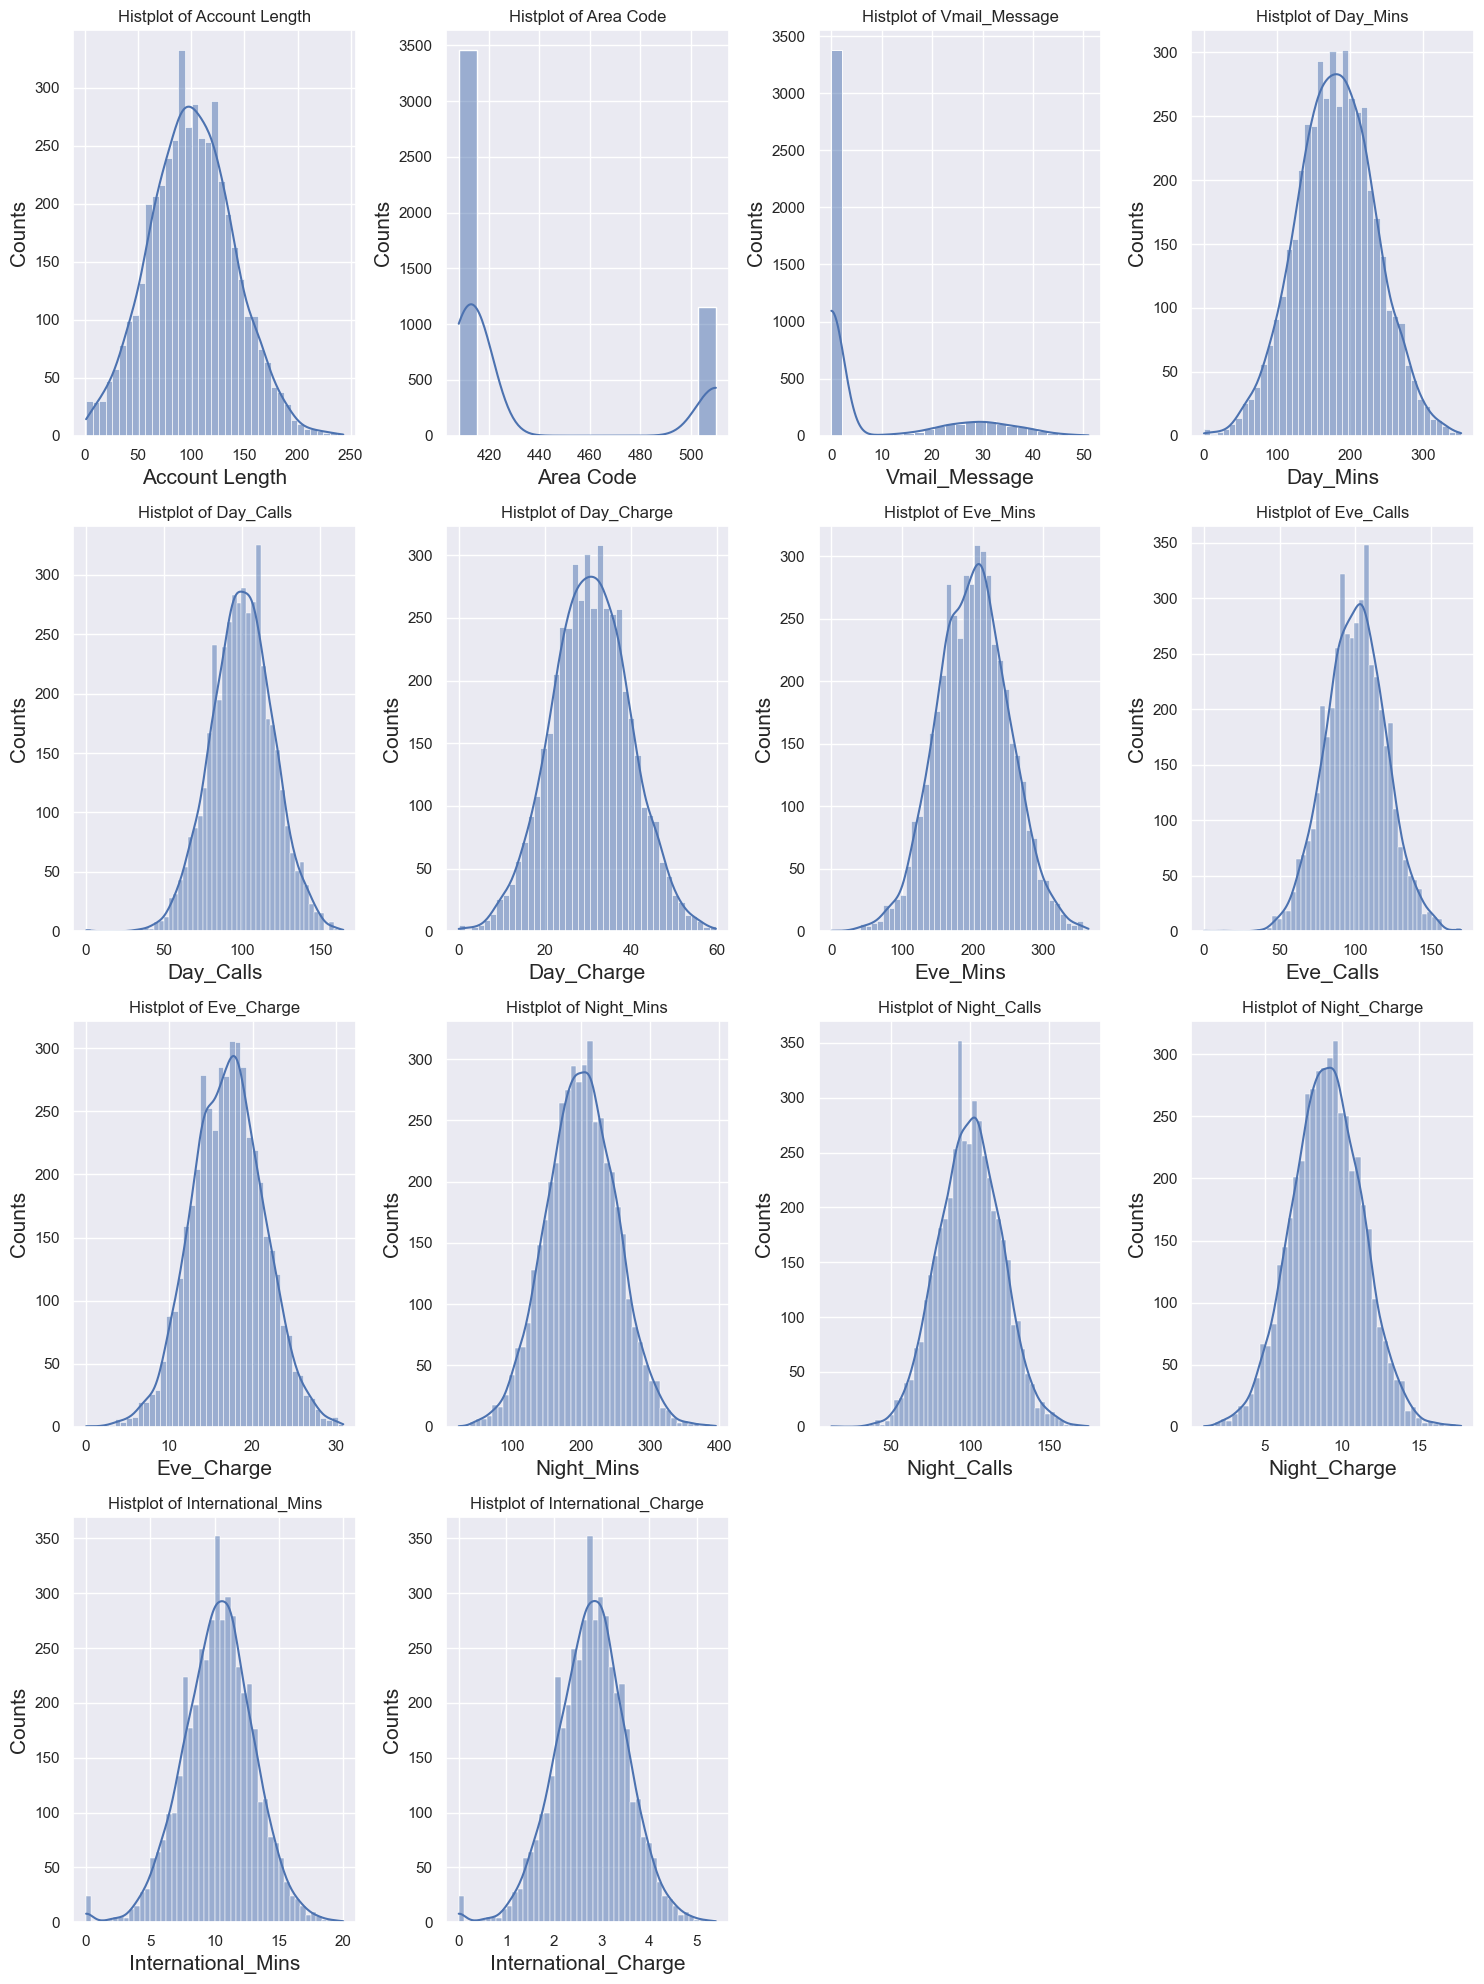

In [36]:
plt.figure(figsize = (15, 20), facecolor = 'white')
plotnumber = 1
for column in continous_feature.columns:
    if plotnumber <= 16:
        plt.subplot(4,4, plotnumber)
        sns.histplot( x = df[column], kde = True, palette='bright')
        plt.title(f"Histplot of {column}")
        plt.xlabel(column, fontsize = 15)
        plt.ylabel("Counts", fontsize = 15)
        plotnumber += 1

plt.tight_layout()
plt.show()

# Bivariate Analysis:

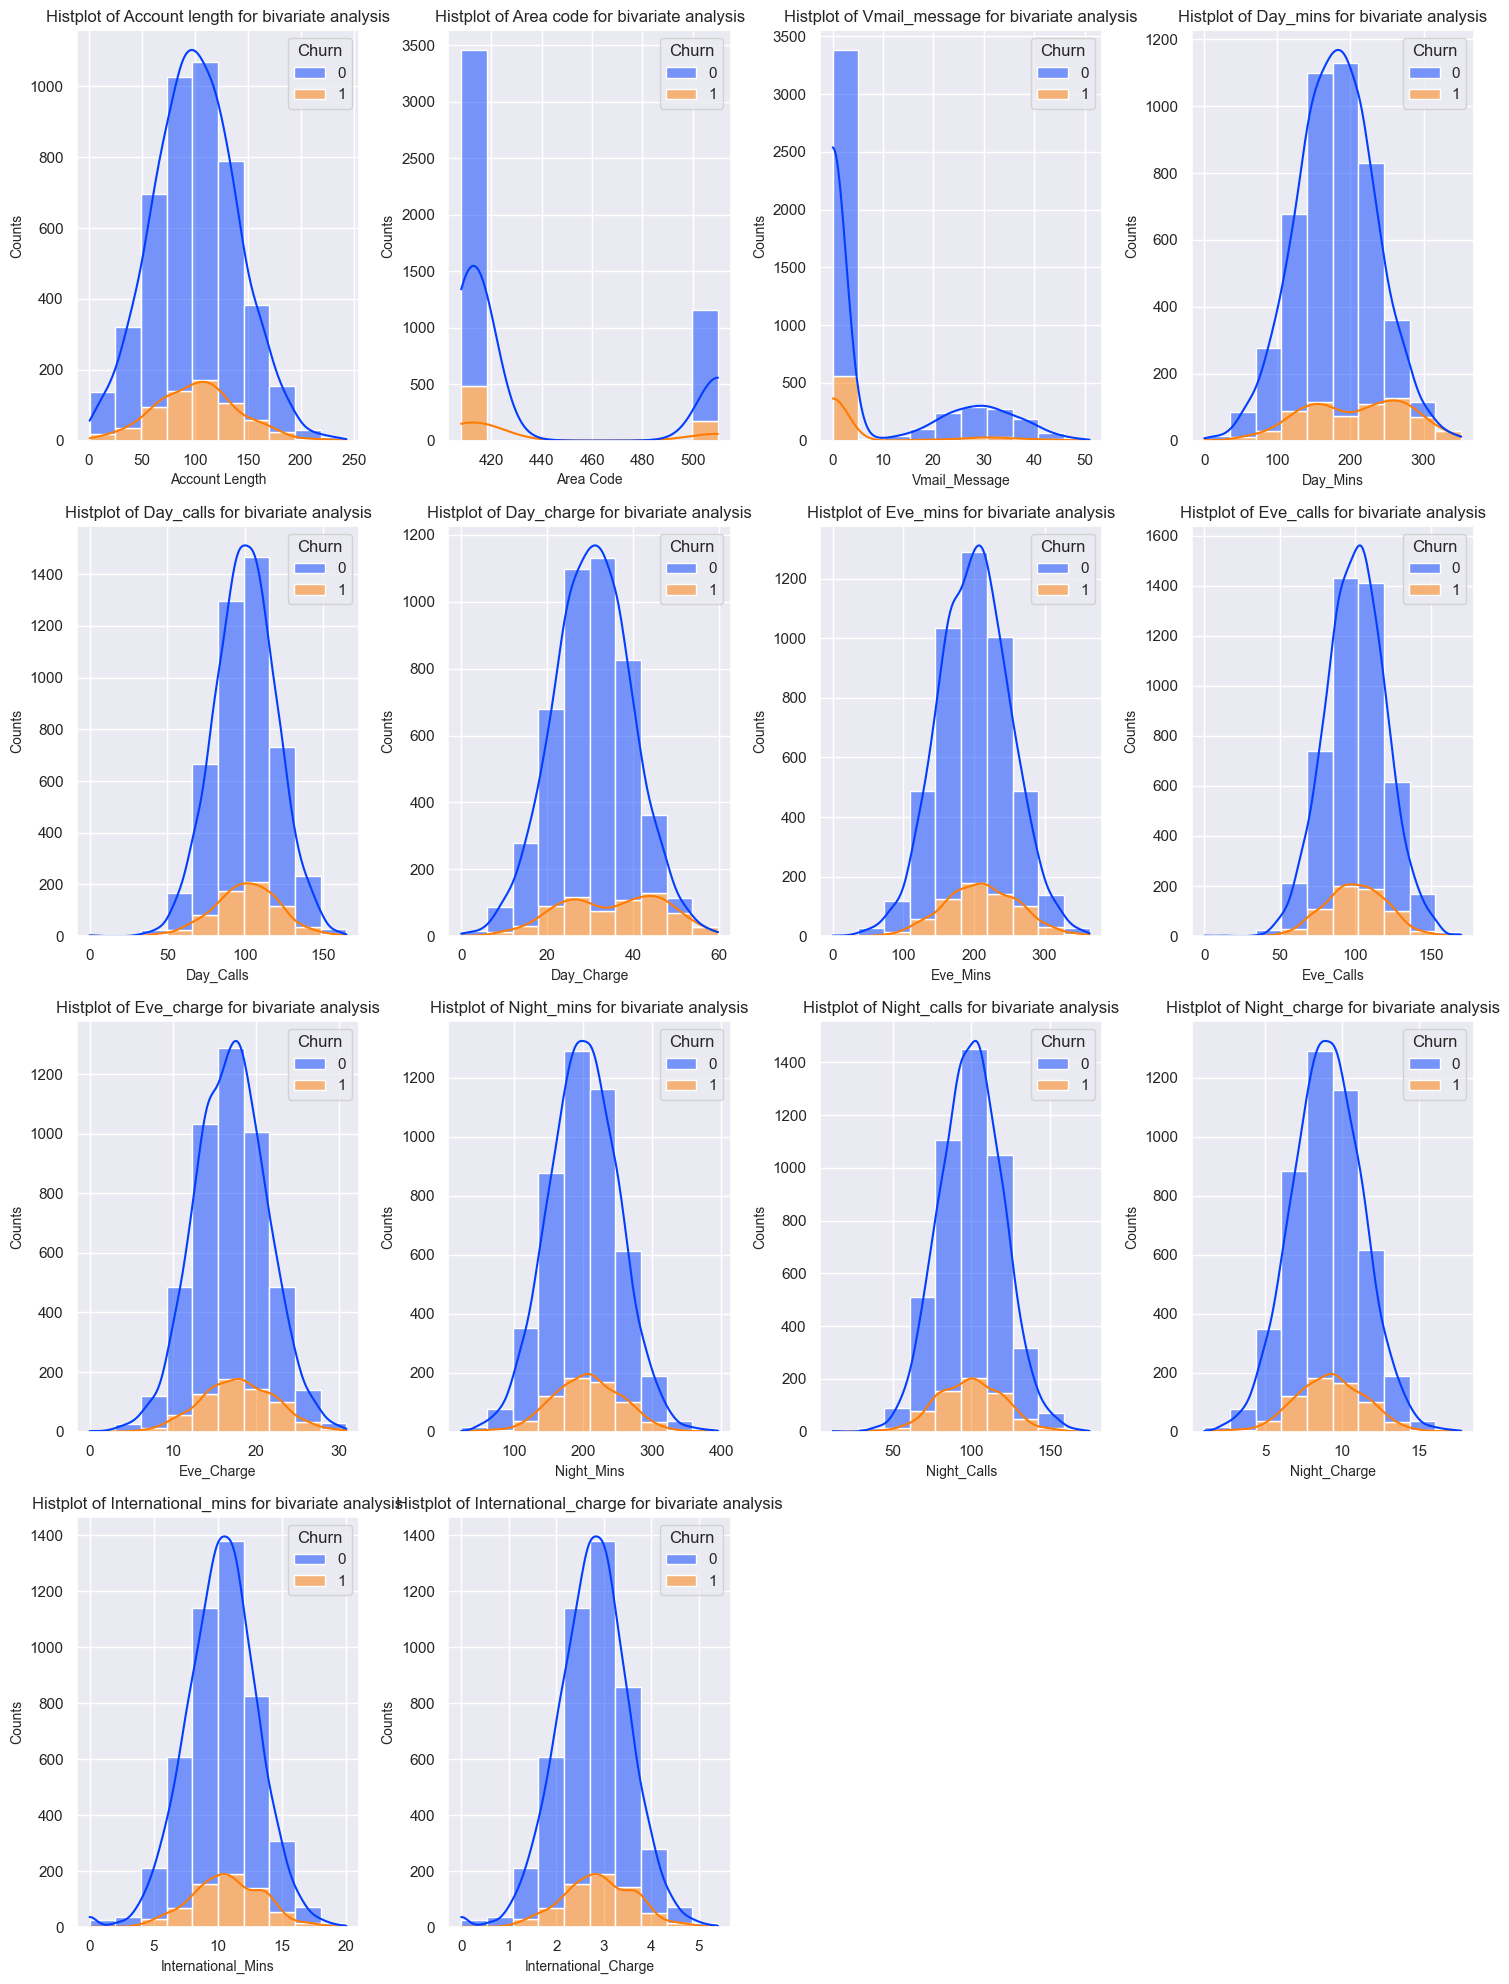

In [37]:
plt.figure(figsize = (15, 20), facecolor = 'white')
plotnumber =1
for column in continous_feature.columns:
    if plotnumber <= 16:
        plt.subplot(4,4,plotnumber)
        sns.histplot(x = df[column], hue = df['Churn'], multiple='stack', palette='bright', bins=10, kde = True)
        plt.title(f"Histplot of {column.capitalize()} for bivariate analysis")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Counts', fontsize= 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

# Univariate Analysis of Discrete feature :

In [38]:
discret_feat = df[['International_calls','CustServ_Calls','Churn']]

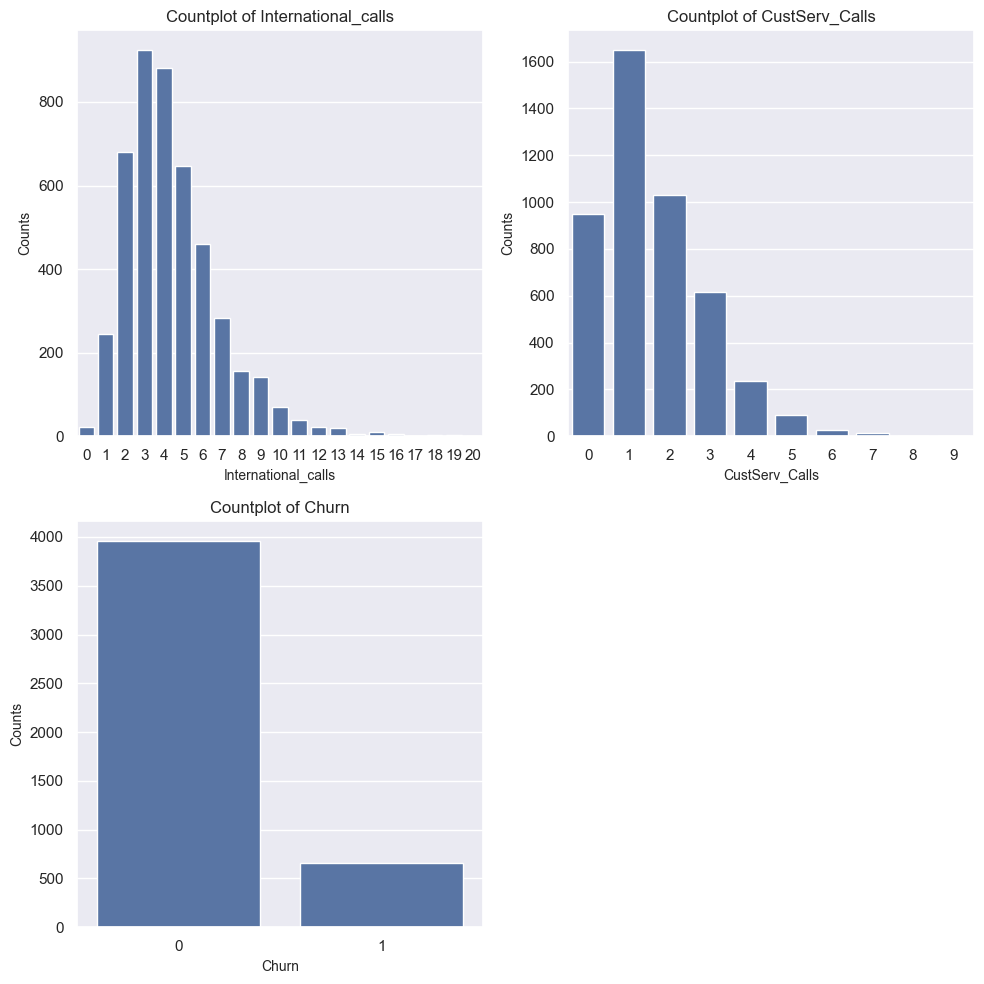

In [39]:
plt.figure(figsize = (10, 10), facecolor = 'white')
plotnumber = 1
for column in discret_feat.columns:
    if plotnumber <= 4:
        plt.subplot(2,2,plotnumber)
        sns.countplot(x = df[column])
        plt.title(f"Countplot of {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel("Counts", fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

## Insights for discrete features >:

## International_Calls:

1. **Moderate Calling Activity:** The majority of customers engage in a moderate level of international calling activity, with the most common counts being 3 and 4 calls.
   
2. **Decreasing Frequency:** The frequency of customers making international calls decreases gradually as the number of calls increases.
   
3. **Rare High Call Counts:** There are very few instances of customers making a high number of international calls (e.g., 15, 16, 18, 19, 20), indicating that extensive international calling is uncommon.


## Insights from CustServ_Calls:

1. **Common Scenarios:**
   - Most customers made 1 or 2 service calls, indicating swift issue resolution for the majority.
   - A notable portion didn't call, suggesting satisfaction or no need for assistance.

2. **Decreasing Frequency:**
   - Frequency declines sharply beyond 2 calls, indicating rare instances of multiple interactions.
   - Few customers made more than 4 calls, implying uncommon prolonged issues.

3. **Customer Experience:**
   - Majority's issues resolved within 1-2 calls, positive for overall satisfaction.
   - Few multiple calls suggest potential unresolved issues, addressing which could enhanc
## Insights for the target variable "Churn":

1. **Churn Rate:**
   - Out of all customers, 656 churned, indicating a churn rate of approximately 14%.
   
2. **Retention Rate:**
   - The majority (3961) did not churn, representing a retention rate of around 86%.e loyalty.



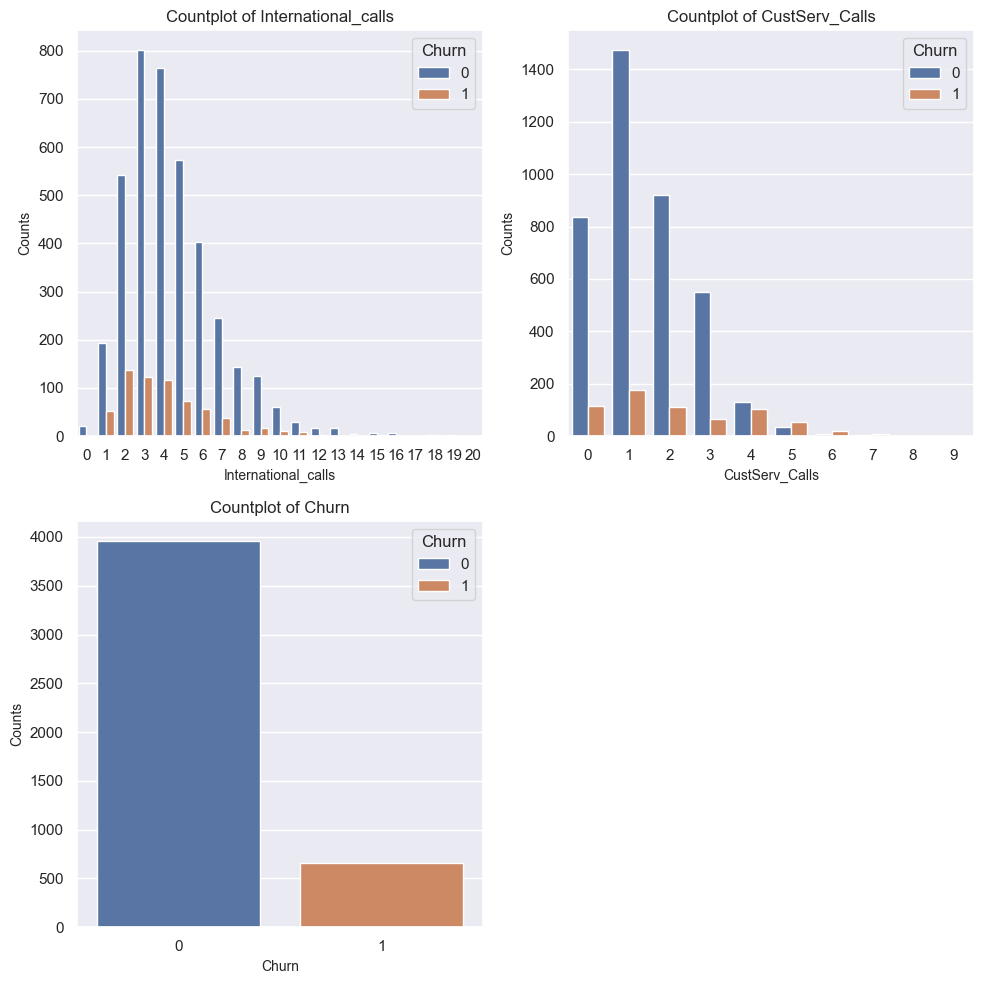

In [40]:
plt.figure(figsize = (10, 10), facecolor = 'white')
plotnumber = 1
for column in discret_feat.columns:
    if plotnumber <= 4:
        plt.subplot(2,2,plotnumber)
        sns.countplot(x = df[column], hue = df['Churn'])
        plt.title(f"Countplot of {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel("Counts", fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

#  Bivariate Analysis of Discrete Feature

### ** "International_calls"  & "Churn":

1. **Inverse Relationship:** Generally, as international call counts rise, churn rates tend to decrease.
2. **Lower Churn Rates:** Customers making more international calls show lower likelihoods of leaving.
3. **Threshold Effect:** Around 3 to 5 international calls, churn rates stabilize or decrease further.
4. **Retention Indicator:** Higher international call activity may indicate satisfied customers less likely to churn.




### "CustServ_Calls" with respect to churn:

1. **Churn Trends with Service Calls:**
   - Customers who made no service calls (0 calls) have a relatively high churn rate compared to those who made service calls.
   - As the number of service calls increases, churn rates generally tend to decrease.

2. **Churn Rate Variation:**
   - Customers with fewer service calls (0-3 calls) exhibit higher churn rates, while those with more service calls (4-5 calls) show lower churn rates.

3. **Optimal Service Call Range:**
   - There seems to be an optimal range of service calls (around 4-5 calls) associated with lower churn rates.
   - Beyond this range, churn rates increase slightly, suggesting potential dissatisfaction despite the increased support interactions.

4. **Service Call Impact on Retention:**
   - Higher engagement with customer service through a moderate number of calls appears to correlate with better retention, indicating the importance of effective support interactions in customer retention efforts.

# Categorical Features :

In [41]:
categ_feat= df[['State', 'International_Plan', 'Vmail_Plan']]
categ_feat.head()

State International_Plan Vmail_Plan
0    KS                 no        yes
1    OH                 no        yes
2    NJ                 no         no
3    OH                yes         no
4    OK                yes         no

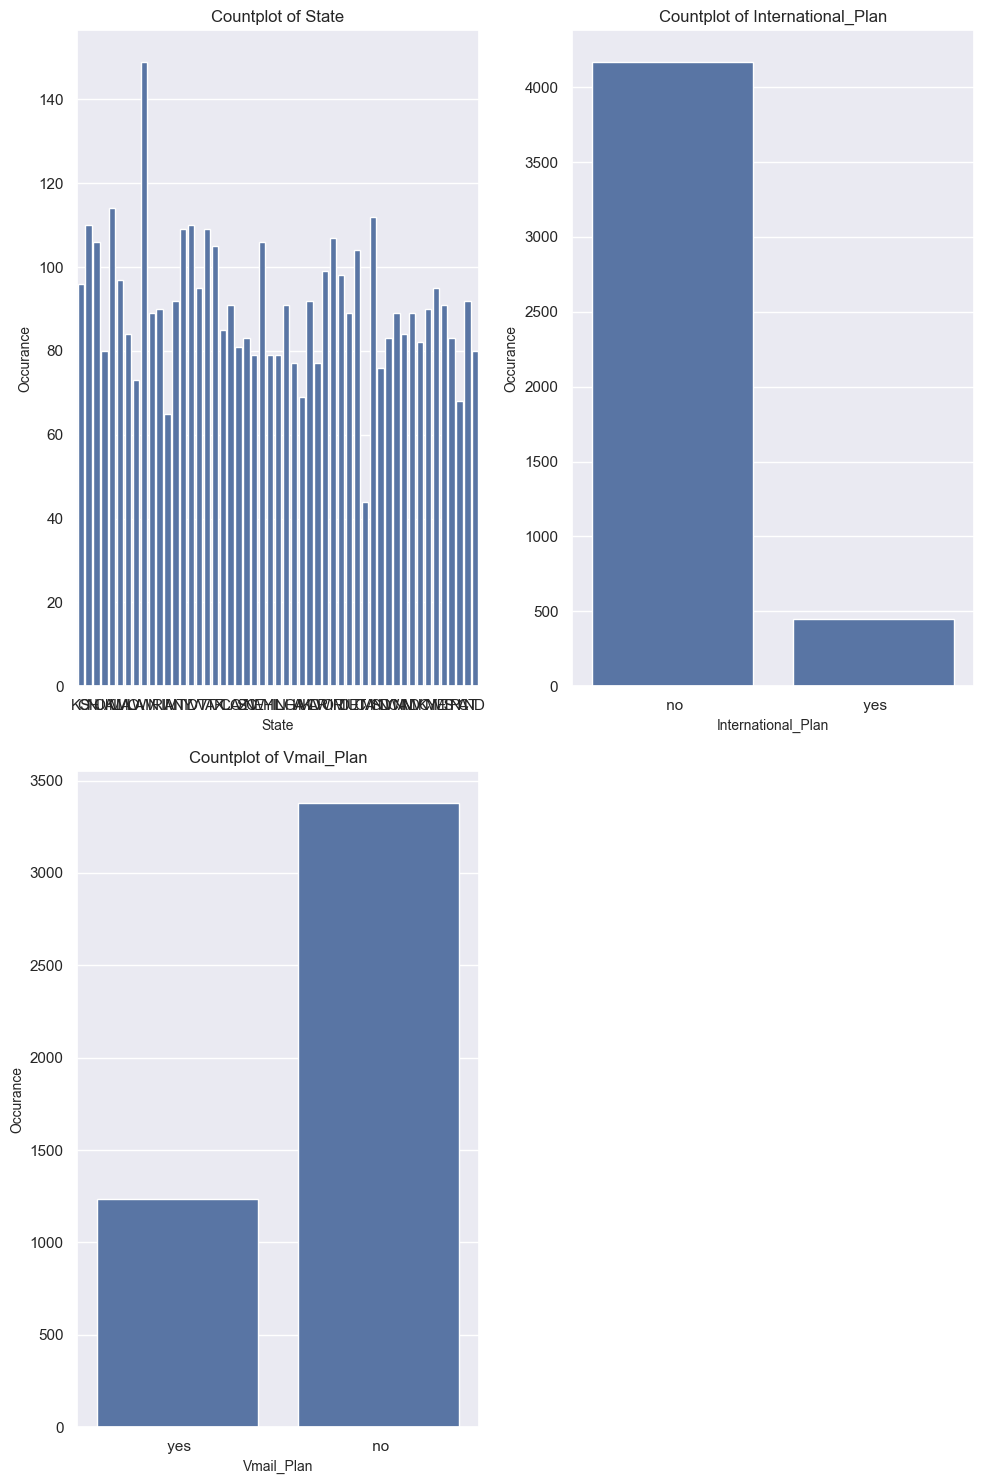

In [42]:
plt.figure(figsize = (10,15), facecolor = 'white')
plotnumber = 1
for column in categ_feat.columns:
    if plotnumber <= 4:
        plt.subplot(2,2,plotnumber)
        sns.countplot(x = df[column])
        plt.title(f"Countplot of {column}")
        plt.xlabel(column, fontsize= 10)
        plt.ylabel('Occurance', fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

# Univariate Analysis of Categorical_Feature:


### "International_Plan" feature:

1. **Distribution of International Plan Subscribers:**
   - The majority of customers (4171) do not have an international plan, while a smaller portion (446) have opted for one.

2. **Insights:**
   - Most customers do not subscribe to an international plan, indicating potential preferences or cost considerations.
   - Understanding the characteristics and behaviors of customers with and without international plans can inform targeted marketing strategies and service offerings.

### Vmail_Plan:


1. **Distribution of Voicemail Plan Subscribers:**
   - The majority of customers (3381) do not have a voicemail plan, while a substantial portion (1236) have opted for one.

2. **Insights:**
   - Most customers do not subscribe to a voicemail plan, indicating potential preferences or usage patterns.
   - Understanding the characteristics and behaviors of customers with and without voicemail plans can inform targeted marketing strategies and service offerings.

### Bivariate Analysis of Categorical Features:

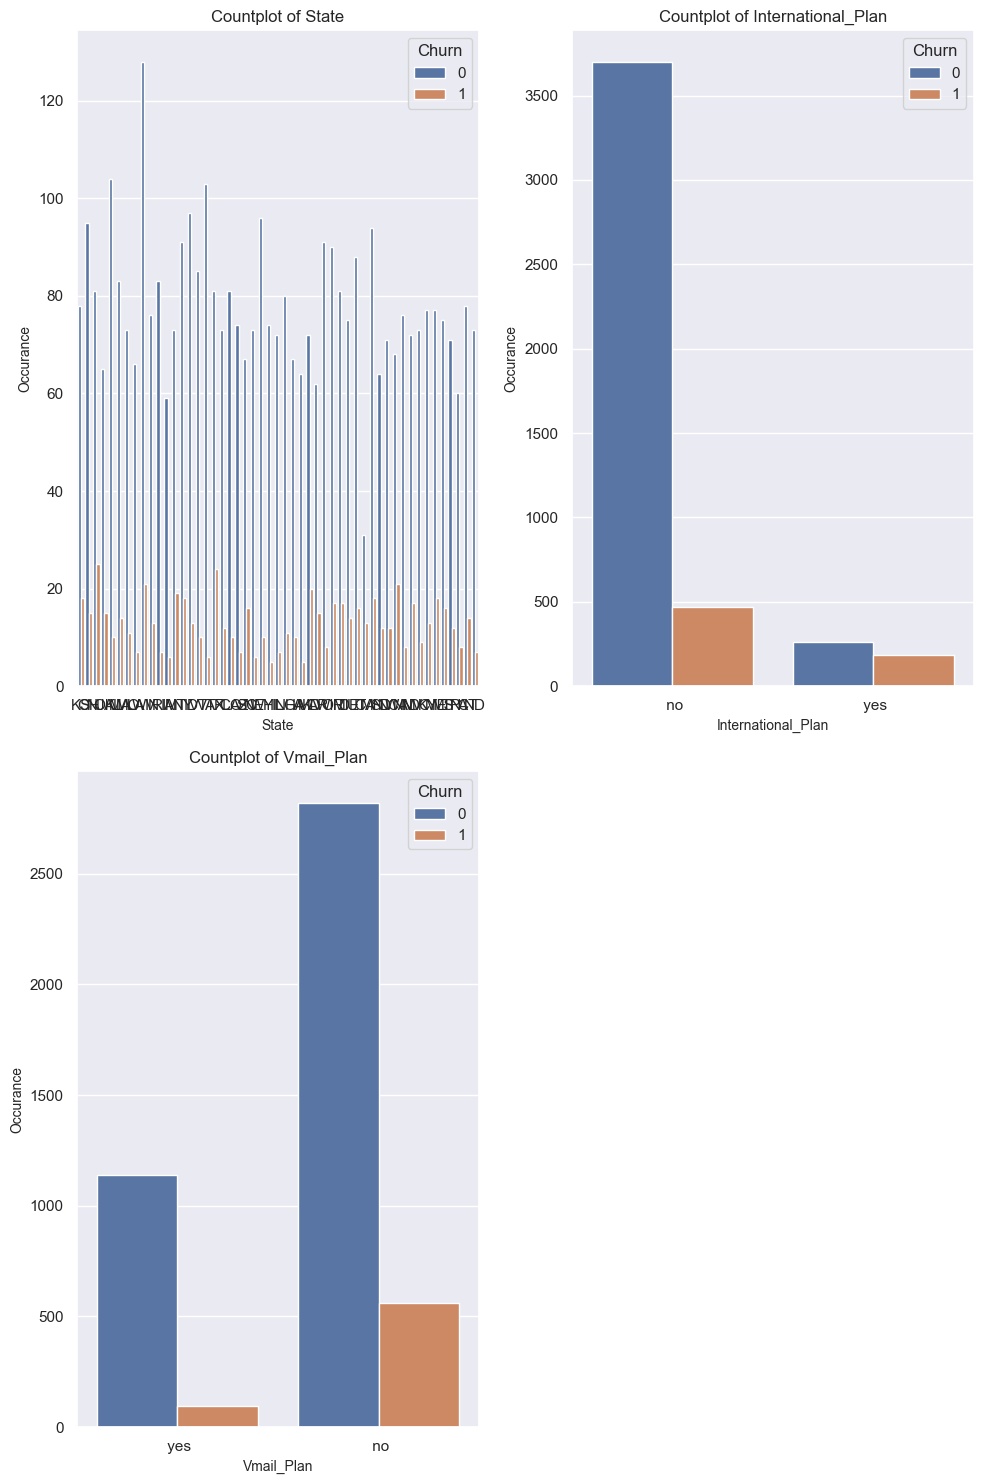

In [43]:
plt.figure(figsize = (10,15), facecolor = 'white')
plotnumber = 1
for column in categ_feat.columns:
    if plotnumber <= 4:
        plt.subplot(2,2,plotnumber)
        sns.countplot(x = df[column], hue = df['Churn'])
        plt.title(f"Countplot of {column}")
        plt.xlabel(column, fontsize= 10)
        plt.ylabel('Occurance', fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

# Insights from Bivariate analays of categorical Features:

### International Plan:

1. **Churn by International Plan:**
   - Customers without an international plan are the majority in both churned and non-churned categories.
   - Churn rates are higher among customers with an international plan compared to those without it.

2. **Impact of International Plan:**
   - Having an international plan doesn't guarantee customer retention, as evidenced by the significant churn among plan subscribers.
   
3. **Retention Focus:**
   - While most non-plan customers stay, there's room to improve retention strategies for international plan subscribers.


### Vmail_plan:

1. **Churn and Voicemail Plan:**
   - Most customers without a voicemail plan leave (churn), while many stay.
   - Customers with a voicemail plan are less likely to leave compared to those without it.

2. **Effect of Voicemail Plan:**
   - Having a voicemail plan helps keep customers around.
   
3. **Opportunities for Retention:**
   - We could focus more on keeping customers without voicemail plans.
   - Customers with voicemail plans are generally sticking around, which is good.

# Lets plot correlation matrix:

### Multivariate Analysis:

In [44]:
mult = df[['Account Length', 'Area Code', 'Vmail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'International_Mins',
       'International_Charge','Churn']]

In [45]:
mult.corr()

Account Length  Area Code  Vmail_Message  Day_Mins  \
Account Length              1.000000  -0.020394      -0.012983  0.002002   
Area Code                  -0.020394   1.000000      -0.002597 -0.018900   
Vmail_Message              -0.012983  -0.002597       1.000000  0.009028   
Day_Mins                    0.002002  -0.018900       0.009028  1.000000   
Day_Calls                   0.032783  -0.013179      -0.003846 -0.002823   
Day_Charge                  0.001999  -0.018903       0.009025  1.000000   
Eve_Mins                   -0.006778   0.011513       0.017872 -0.010260   
Eve_Calls                   0.015598  -0.011528      -0.006508  0.012990   
Eve_Charge                 -0.006775   0.011533       0.017878 -0.010268   
Night_Mins                 -0.002077   0.002794       0.004672  0.009604   
Night_Calls                -0.009482   0.015316       0.000889  0.005165   
Night_Charge               -0.002095   0.002782       0.004665  0.009591   
International_Mins          0.003483  -0.007292       0.005167 -0.012314   
International_Charge        0.003501  -0.007386       0.005202 -0.012261   
Churn                       0.018046   0.011995      -0.096884  0.202439   

                      Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  \
Account Length         0.032783    0.001999 -0.006778   0.015598   -0.006775   
Area Code             -0.013179   -0.018903  0.011513  -0.011528    0.011533   
Vmail_Message         -0.003846    0.009025  0.017872  -0.006508    0.017878   
Day_Mins              -0.002823    1.000000 -0.010260   0.012990   -0.010268   
Day_Calls              1.000000   -0.002821 -0.006430   0.003923   -0.006429   
Day_Charge            -0.002821    1.000000 -0.010255   0.012992   -0.010262   
Eve_Mins              -0.006430   -0.010255  1.000000   0.001135    1.000000   
Eve_Calls              0.003923    0.012992  0.001135   1.000000    0.001151   
Eve_Charge            -0.006429   -0.010262  1.000000   0.001151    1.000000   
Night_Mins             0.010730    0.009606 -0.018830   0.002610   -0.018839   
Night_Calls           -0.013299    0.005164  0.014226  -0.015463    0.014231   
Night_Charge           0.010724    0.009593 -0.018837   0.002624   -0.018846   
International_Mins     0.012951   -0.012315  0.000165  -0.002798    0.000163   
International_Charge   0.013055   -0.012262  0.000172  -0.002831    0.000170   
Churn                  0.016268    0.202434  0.087042   0.001943    0.087036   

                      Night_Mins  Night_Calls  Night_Charge  \
Account Length         -0.002077    -0.009482     -0.002095   
Area Code               0.002794     0.015316      0.002782   
Vmail_Message           0.004672     0.000889      0.004665   
Day_Mins                0.009604     0.005165      0.009591   
Day_Calls               0.010730    -0.013299      0.010724   
Day_Charge              0.009606     0.005164      0.009593   
Eve_Mins               -0.018830     0.014226     -0.018837   
Eve_Calls               0.002610    -0.015463      0.002624   
Eve_Charge             -0.018839     0.014231     -0.018846   
Night_Mins              1.000000     0.025742      0.999999   
Night_Calls             0.025742     1.000000      0.025722   
Night_Charge            0.999999     0.025722      1.000000   
International_Mins     -0.004549    -0.006431     -0.004546   
International_Charge   -0.004500    -0.006439     -0.004497   
Churn                   0.043262    -0.006671      0.043260   

                      International_Mins  International_Charge     Churn  
Account Length                  0.003483              0.003501  0.018046  
Area Code                      -0.007292             -0.007386  0.011995  
Vmail_Message                   0.005167              0.005202 -0.096884  
Day_Mins                       -0.012314             -0.012261  0.202439  
Day_Calls                       0.012951              0.013055  0.016268  
Day_Charge                     -0.012315             -0.012262  0

# Insights :



1. **Strong Relationship between Usage and Charges:** Features related to usage, such as Day_Mins and Day_Charge, show a strong positive correlation, indicating that higher usage is associated with higher charges.

2. **Account Length's Limited Influence:** Account Length exhibits minimal correlation with other features, suggesting it may not strongly influence usage behavior or charges.

3. **Weak Correlation with Area Code:** The Area Code feature demonstrates weak correlations with other variables, indicating it may have limited impact on usage patterns or charges.

4. **Negative Correlation with Voicemail Messages:** There's a weak negative correlation between Voicemail Messages and Churn, implying that customers with more voicemail messages may be slightly less likely to churn, though the relationship is not strong.

5. **Moderate Correlation between International Features:** International_Mins and International_Charge exhibit a moderate positive correlation, suggesting that higher international call minutes are associated with higher international call charges.

6. **Limited Correlation with Night Usage:** Features related to nighttime usage (Night_Mins, Night_Calls, Night_Charge) show limited correlation with other variables, indicating nighttime usage may not strongly influence overall charges or churn.

7. **Eve Usage and Charges:** Eve_Mins and Eve_Charge display a moderate positive correlation, similar to daytime usage, indicating a relationship between evening usage and charges.

8. **Daytime Call Frequency:** Day_Calls shows a weak positive correlation with some usage and charge features, suggesting that higher daytime call frequency may be associated with higher usage and charges, though the relationship is not strong.

9. **Churn Correlations:** Churn exhibits varied correlations with other features, indicating that factors influencing churn may not be solely dependent on usage or charges, but potentially influenced by a combination of factors such as voicemail usage or international calling behavior.






### Based on the insights from the correlation matrix, the telecom company can consider the following decisions:

1. **Usage-Based Pricing:** Implement usage-based pricing plans that align with the strong relationship between usage and charges. This could involve offering flexible packages tailored to customers' usage patterns.

2. **Customer Retention Strategies:** Develop targeted retention strategies for customers with high voicemail usage, as they may be less likely to churn. This could involve providing incentives or personalized offers to encourage loyalty.

3. **International Calling Plans:** Offer competitive international calling plans, considering the moderate correlation between international call minutes and charges. This could attract customers who frequently make international calls.

4. **Enhanced Evening Services:** Enhance evening services or offers to capitalize on the moderate correlation between evening usage and charges. This could include promotional offers on evening calls or data usage during off-peak hours.

5. **Area-Specific Initiatives:** Explore area-specific initiatives or marketing campaigns based on the weak correlations with area codes. This could involve targeted promotions or services tailored to customers in specific geographic regions.

6. **Customer Communication:** Communicate transparently with customers about billing practices and the factors influencing charges, given the strong relationship between usage and charges. This could improve customer satisfaction and trust.

7. **Churn Prediction and Prevention:** Invest in churn prediction models that consider various factors beyond usage and charges, such as voicemail usage or international calling behavior. This could help identify at-risk customers and implement proactive retention9strategies.

8. **Customer Engagement Programs:** Launch customer engagement programs to encourage daytime usage and calls, leveraging the weak correlations between daytime call frequency and usage/charges. This could increase overall customer engagement and10satisfaction.

9. **Continuous Monitoring and Analysis:** Continuously monitor usage patterns and customer behavior to identify emerging trends and opportunities for improvement. This could involve regular analysis of customer data and feedback to inform strategic decisions and initiatives.

By implementing these decisions, the telecom company can better meet the needs of its customers, improve retention rates, and drive business growth in a competitive market.

In [46]:
# sns.pairplot(mult, diag_kind='kde', hue = 'Churn')
# plt.show()



1. **Creating Color Palette:** Generates a color palette with distinct colors for visualizing data trends in the heatmaps.

2. **Handling Missing Values:** Replaces any missing values in the DataFrame with zeros to ensure that the heatmaps are not disrupted by NaNs.

3. **Plotting Heatmaps:** Separates the data based on churn status, computes summary statistics for churned and non-churned customers, and then plots two side-by-side heatmaps to visualize the average values of each feature for each customer group.

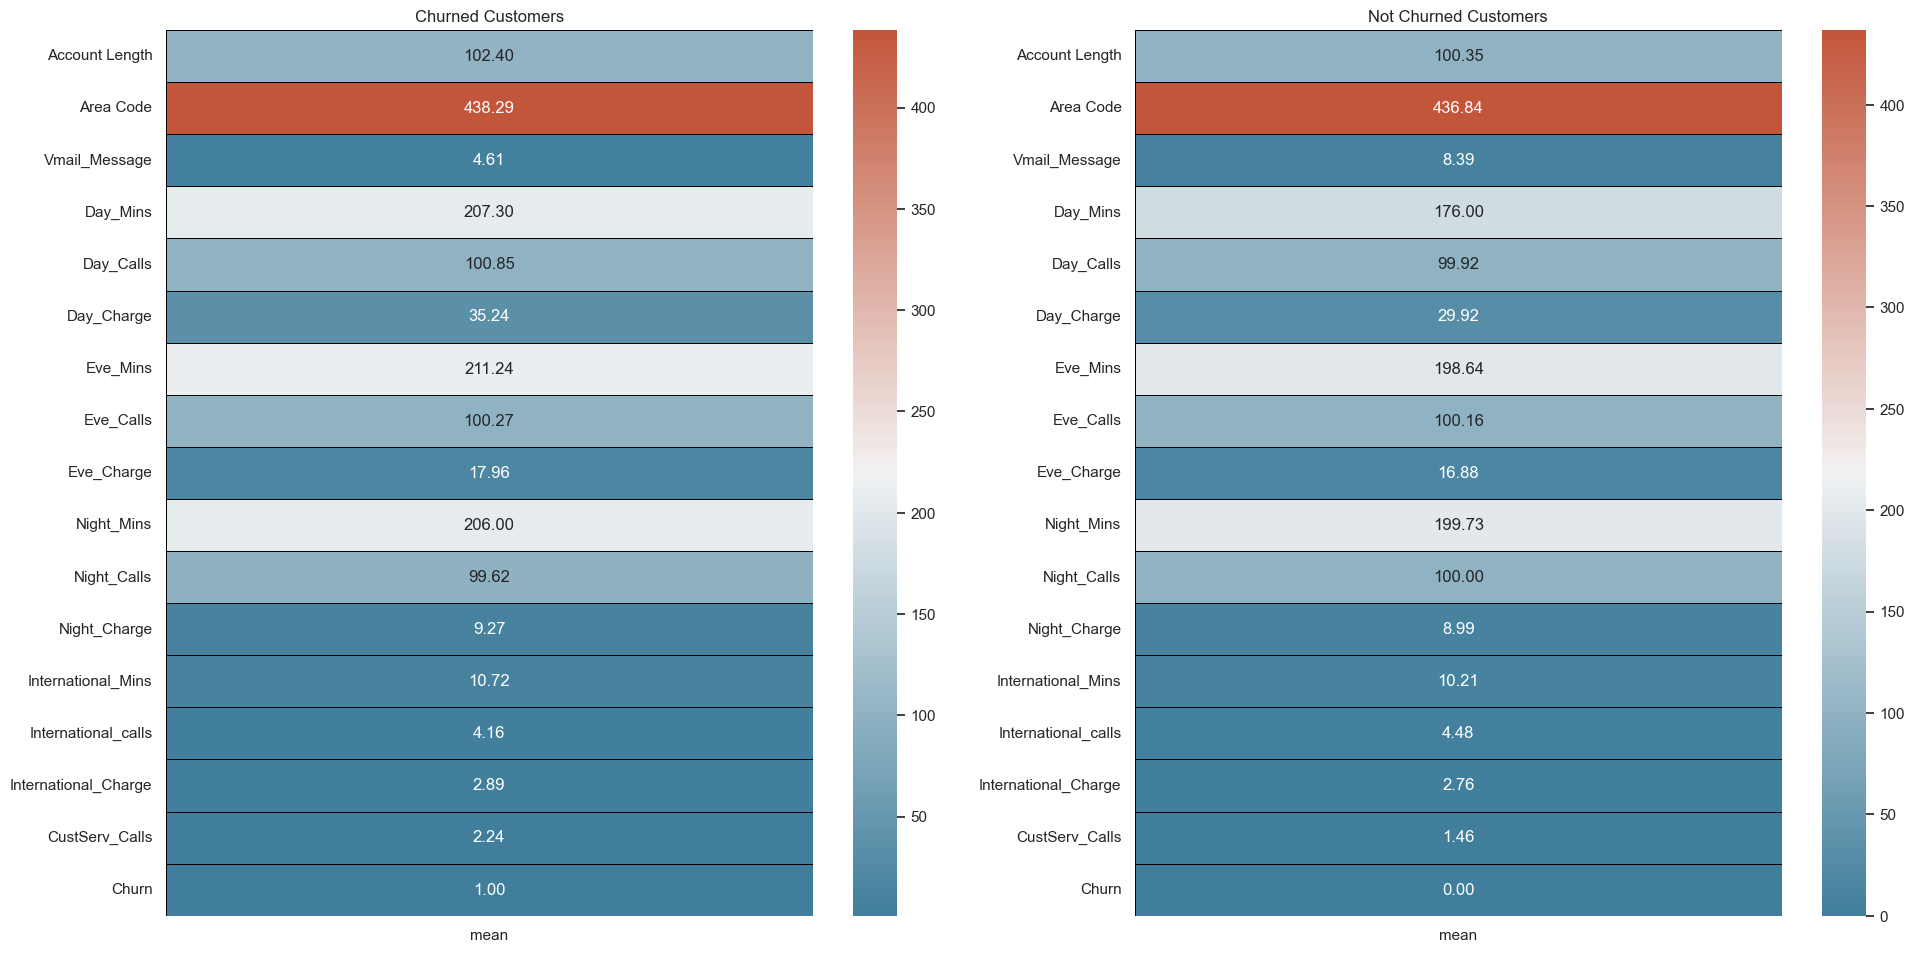

In [47]:
# Improved color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Ensure no NaN values which could disrupt the heatmaps
df.fillna(0, inplace=True)

# Split data based on 'Churn' column
churn = df[df['Churn'] == 1].describe().T
not_churn = df[df['Churn'] == 0].describe().T

# Plot settings
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.heatmap(churn[['mean']], annot=True, cmap=cmap, linewidths=0.4, linecolor='black', cbar=True, fmt='.2f', ax=ax[0])
ax[0].set_title('Churned Customers')

sns.heatmap(not_churn[['mean']], annot=True, cmap=cmap, linewidths=0.4, linecolor='black', cbar=True, fmt='.2f', ax=ax[1])
ax[1].set_title('Not Churned Customers')

# Adjust layout for better readability and to prevent overlap
fig.tight_layout(pad=2)
plt.show()

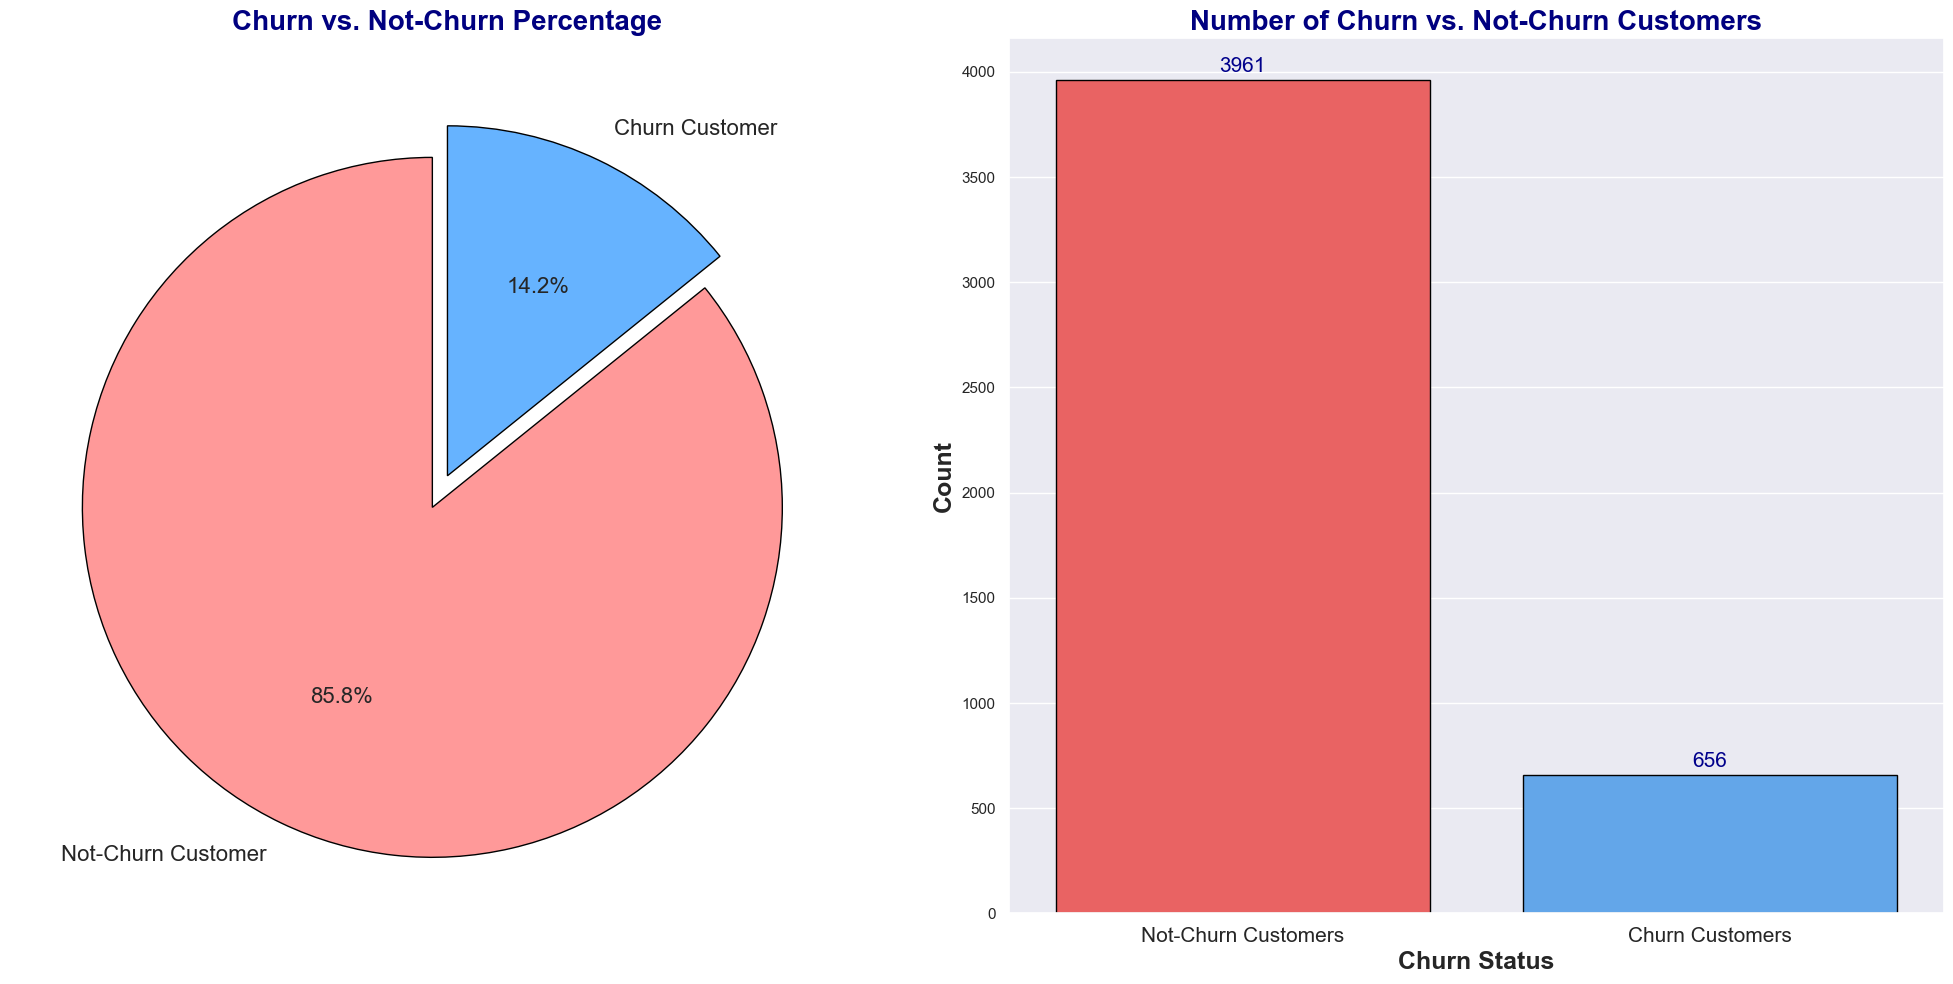

In [48]:
# Calculating percentages for pie chart
churn_counts = df['Churn'].value_counts()
circle = [count / sum(churn_counts) * 100 for count in churn_counts]

# Colors for plotting
colors_pie = ['#ff9999','#66b3ff']  # Light red and light blue for pie chart
colors_bar = ['#ff4d4d', '#4da6ff']  # Brighter shades for bar chart

# Setting up the plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Pie chart
axs[0].pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors_pie,
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}, textprops={'fontsize': 16})
axs[0].set_title('Churn vs. Not-Churn Percentage', fontsize=20, fontweight='bold', color='navy')

# Bar chart
sns.countplot(x='Churn', data=df, palette=colors_bar, edgecolor='black', ax=axs[1])
axs[1].set_title('Number of Churn vs. Not-Churn Customers', fontsize=20, fontweight='bold', color='navy')
axs[1].set_xlabel('Churn Status', fontsize=18, fontweight='bold')
axs[1].set_ylabel('Count', fontsize=18, fontweight='bold')
axs[1].set_xticklabels(['Not-Churn Customers', 'Churn Customers'], fontsize=15)

# Adding text labels above bars
for container in axs[1].containers:
    axs[1].bar_label(container, padding=3, fontsize=15, color='darkblue')

plt.tight_layout()
plt.show()

In [49]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International_Plan',
       'Vmail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [50]:
# Categorical Varibles

In [51]:
# # # # Define the columns to plot
# # columns_to_plot = ['Area Code', 'International_Plan', 'Vmail_Plan']

# # # # Set up the plot grid
# fig, axs = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))  # All plots in a single row

# # # # Colors for the plot
# colors = ["#66b3ff", "#ff9999"]  # Churn: no and yes


# for i, col in enumerate(columns_to_plot):
#      ax = sns.countplot(x=col, data=df, hue='Churn', palette=colors, ax=axs[i])
#      ax.set_title(f'Distribution of {col} by Churn', fontsize=15)
#      ax.set_xlabel(col, fontsize=12)
#      ax.set_ylabel('Count', fontsize=12)
#      ax.legend(title='Churn Status', title_fontsize='13', fontsize='12')
    
# # #     # Add text annotations for each bar for better clarity
#      for p in ax.patches:
#          ax.annotate(format(p.get_height(), '.0f'), 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      xytext = (0, 10), 
#                      textcoords = 'offset points', fontsize=10)

# # Adjust layout to prevent overlap of titles, labels, etc.
# plt.tight_layout()
# plt.show()


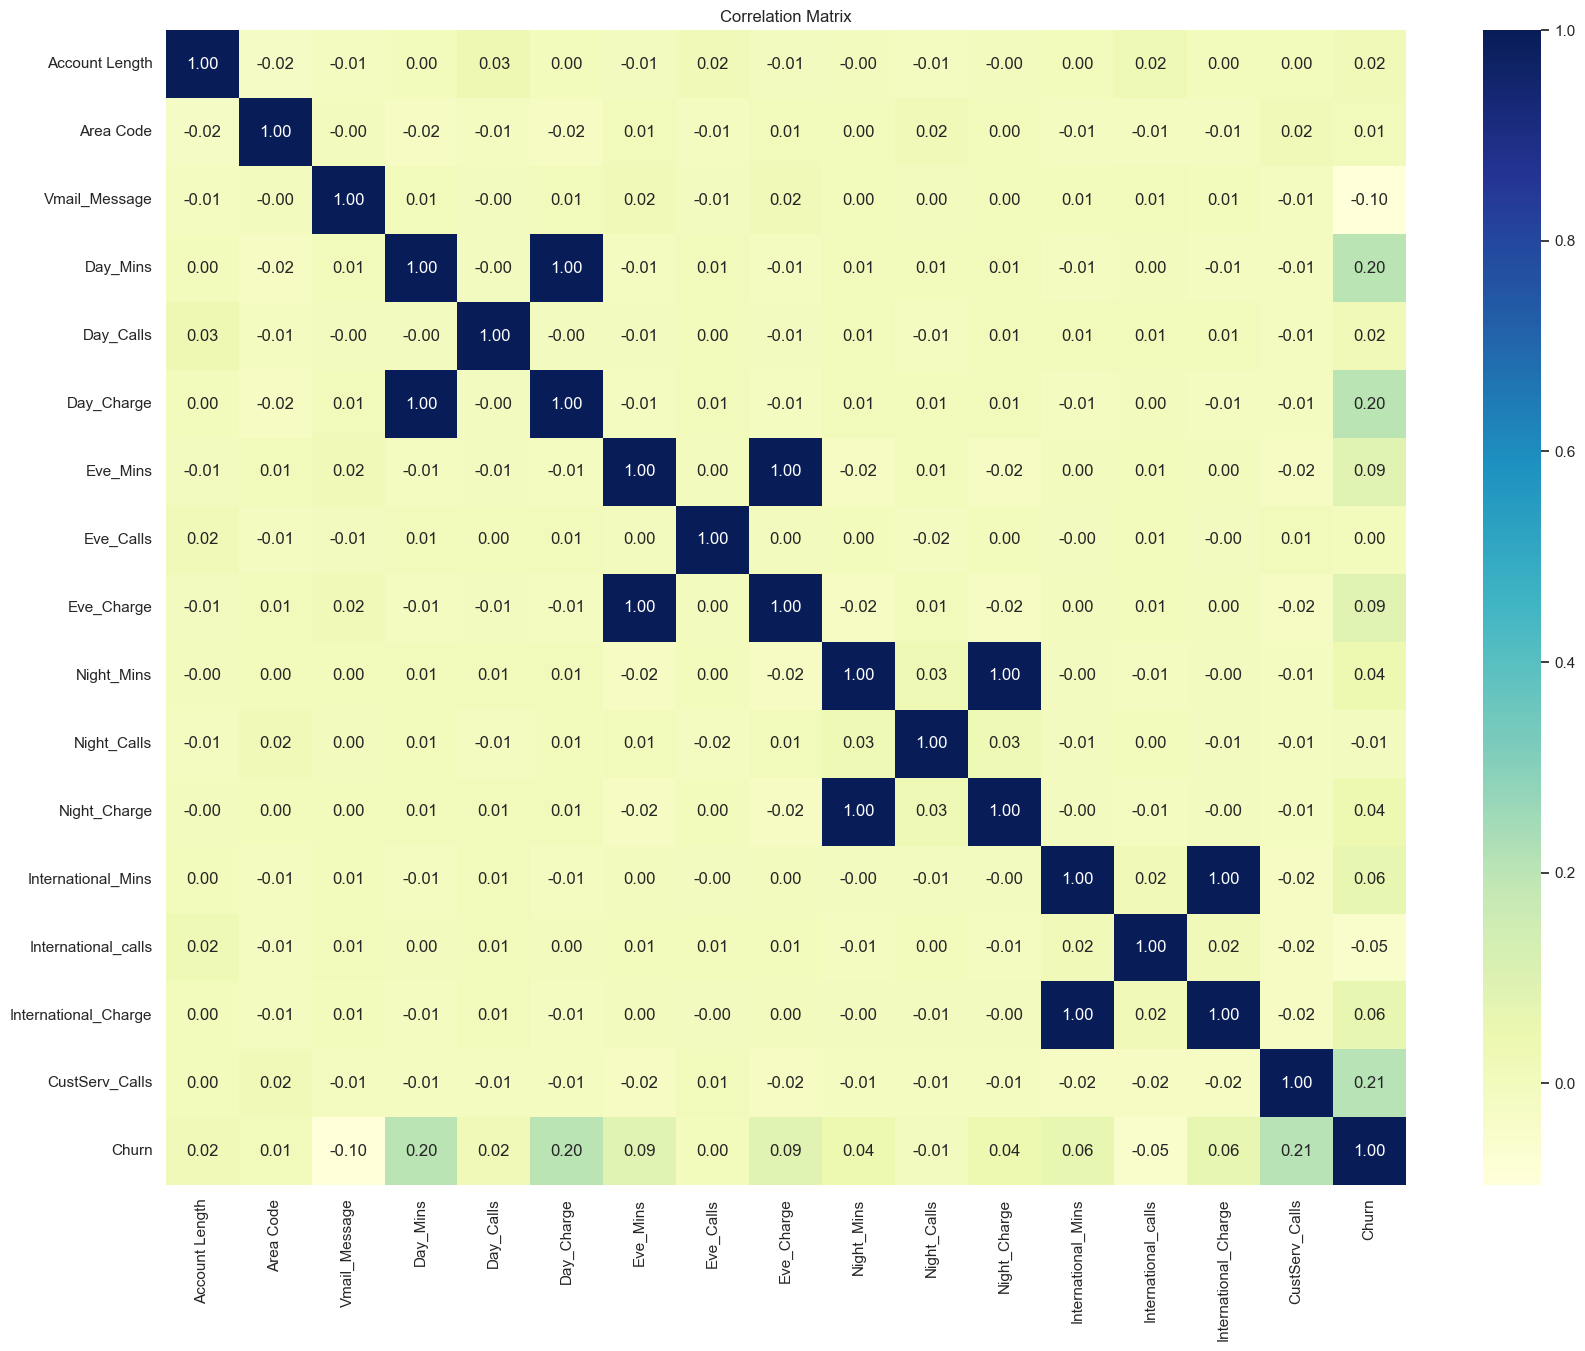

In [52]:
# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering:

In [53]:
print(df.International_Plan.value_counts())
print("=="*10)
print(df.Vmail_Plan.value_counts())

 no     4171
 yes     446
Name: International_Plan, dtype: int64
 no     3381
 yes    1236
Name: Vmail_Plan, dtype: int64


Creating the 'Combined_Plans' feature captures interaction effects between international and voicemail plans, offering insights into nuanced customer behaviors. This segmentation enables tailored retention strategies, enhances predictive models' accuracy, and informs proactive churn mitigation efforts in the telecom industry.

In [54]:
df['Combine_Plans'] = df['International_Plan'] +'_'+df['Vmail_Plan']
df['Combine_Plans'] = df['Combine_Plans'].str.strip()

In [55]:
df['Combine_Plans'].value_counts()

no_ no      3060
no_ yes     1111
yes_ no      321
yes_ yes     125
Name: Combine_Plans, dtype: int64

In [56]:
df['Combine_Plans'] = df['Combine_Plans'].map({'no_ no':0,'no_ yes':1,'yes_ no':2,'yes_ yes':3 })
df['Combine_Plans']

0       1
1       1
2       0
3       2
4       2
       ..
4612    1
4613    1
4614    1
4615    1
4616    0
Name: Combine_Plans, Length: 4617, dtype: int64

1. **Average Call Duration:**
   - **What it is:** It tells us how long, on average, each call lasts for a customer.
   - **Why it's important:** Helps understand how much time customers spend on calls, which can help improve service plans and spot any changes in customer behavior over time.

2. **Engagement Score:**
   - **What it is:** It's like a score that shows how involved a customer is with the telecom service. It adds up voicemail messages, customer service calls, and international calls.
   - **Why it's important:** Gives a bigger picture of how customers interact with the service beyond just call duration. A higher score means more active involvement, which can indicate satisfaction and loyalty or warn of potential issues. Monitoring this score helps improve services and keep customers happy.

In [57]:
df['Total_mint']= df['Day_Mins'] +df['Eve_Mins'] +df['Night_Mins'] + df['International_Mins']

df['Total_charges'] = df['Day_Charge'] + df['Eve_Charge'] + df['Night_Charge'] + df['International_Charge']

df['Total_call'] = df['Day_Calls'] + df['Eve_Calls'] + df['Night_Calls'] +df['International_calls']

df['Average_call_duration'] = df['Total_mint']/df['Total_call']

# Calculate customer engagement score
df['Engagement_Score'] = df['Vmail_Message'] + df['CustServ_Calls'] + df['International_calls']



# The "Charge Difference" feature is created to compare the total charges for local usage (day, evening,and night) 
#  with the charges for international calls, aiming to understand customer spending patterns and their potential impact on churn behaviour.
df['Charge_Difference'] = df['Day_Charge'] + df['Eve_Charge'] + df['Night_Charge'] - df['International_Charge']

1. **Insight:** The 'charges_Minutes_ratio' feature helps gauge the efficiency of daytime calling plans by revealing the cost per minute incurred by customers.
2. **Analysis:** A higher ratio indicates higher charges relative to the minutes used, potentially suggesting less cost-efficient plans.
3. **Application:** Telecom providers can use this ratio to optimize pricing strategies, tailor tariff plans, and offer better value to customers, ultimately enhancing satisfaction and retention.

In [58]:
df['charges_Minutes_ratio'] = df['Day_Charge'] / df['Day_Mins']



# The 'Call Density' feature indicates how efficiently customers use the telecom service by comparing call duration to charges.
# Low call density may suggest higher churn risk. It helps segment customers and improve churn prediction models, aiding in
# targeted retention efforts.



# Call density refers to the measure of how densely or frequently calls are made relative to the charges incurred.
# It is calculated by dividing the total duration of calls (in minutes) by the total charges for those calls. 
# This metric provides insight into the efficiency of call usage and the value customers derive from the telecom
# service in terms of call duration relative to cost.

df['Call Density'] = df['Total_mint'] / df['Total_charges']

In [59]:
df.head()

State  Account Length  Area Code      Phone International_Plan Vmail_Plan  \
0    KS             128        415   382-4657                 no        yes   
1    OH             107        415   371-7191                 no        yes   
2    NJ             137        415   358-1921                 no         no   
3    OH              84        408   375-9999                yes         no   
4    OK              75        415   330-6626                yes         no   

   Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0             25     265.1        110       45.07     197.4         99   
1             26     161.6        123       27.47     195.5        103   
2              0     243.4        114       41.38     121.2        110   
3              0     299.4         71       50.90      61.9         88   
4              0     166.7        113       28.34     148.3        122   

   Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0       16.78       244.7           91         11.01                10.0   
1       16.62       254.4          103         11.45                13.7   
2       10.30       162.6          104          7.32                12.2   
3        5.26       196.9           89          8.86                 6.6   
4       12.61       186.9          121          8.41                10.1   

   International_calls  International_Charge  CustServ_Calls  Churn  \
0                    3                  2.70               1      0   
1                    3                  3.70               1      0   
2                    5                  3.29               0      0   
3                    7                  1.78               2      0   
4                    3                  2.73               3      0   

   Combine_Plans  Total_mint  Total_charges  Total_call  \
0              1       717.2          75.56         303   
1              1       625.2          59.24         332   
2              0       539.4          62.29         333   
3              2       564.8          66.80         255   
4              2       512.0          52.09         359   

   Average_call_duration  Engagement_Score  Charge_Difference  \
0               2.366997                29              70.16   
1               1.883133                30              51.84   
2               1.619820                 5              55.71   
3               2.214902                 9              63.24   
4               1.426184                 6              46.63   

   charges_Minutes_ratio  Call Density  
0               0.170011      9.491795  
1               0.169988     10.553680  
2               0.170008      8.659496  
3               0.170007      8.455090  
4               0.170006      9.829142

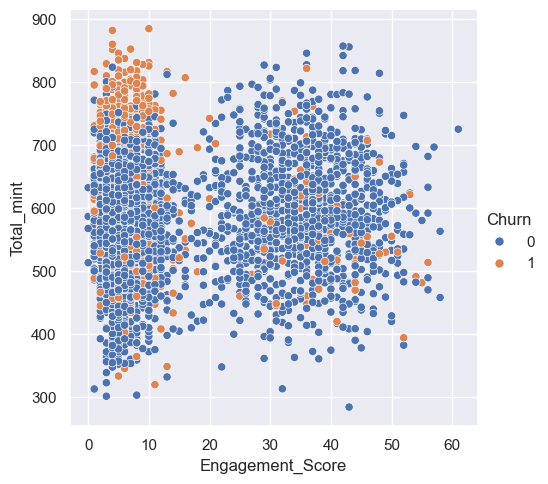

In [60]:
sns.relplot(x = df.Engagement_Score, y = df.Total_mint, hue = df.Churn)

<Axes: xlabel='Total_charges', ylabel='Engagement_Score'>

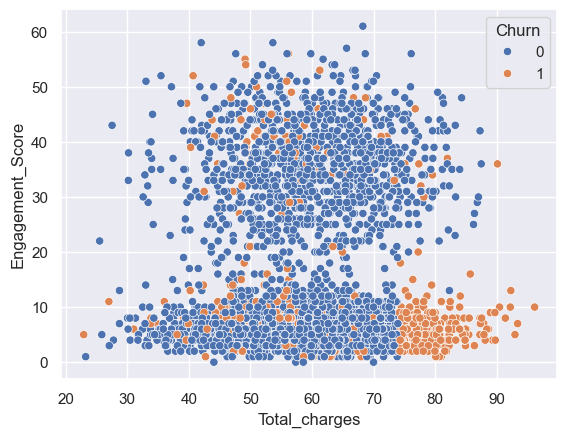

In [61]:
sns.scatterplot(x = df['Total_charges'], y =df['Engagement_Score'], hue = df['Churn'])

In [62]:
# Pair plots
# sns.pairplot(df, hue='Churn',diag_kind='kde', palette='husl')
# plt.show()

<Axes: xlabel='Total_call', ylabel='Average_call_duration'>

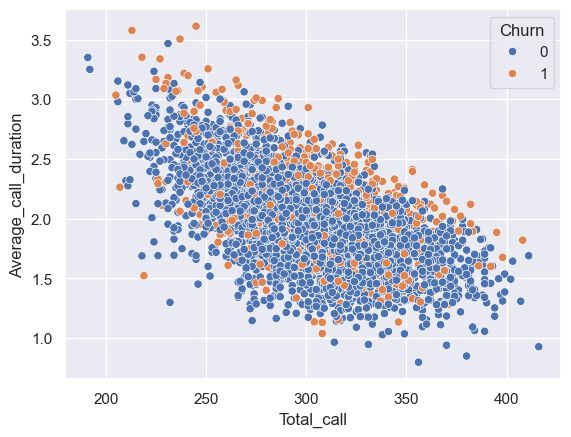

In [63]:
sns.scatterplot(x = df['Total_call'],y = df['Average_call_duration'], hue = df.Churn)

In [64]:
created_features = df[['Combine_Plans','Engagement_Score','Total_charges','Total_mint', 'Total_call','Average_call_duration',
                       'Charge_Difference','charges_Minutes_ratio','Call Density','Churn']]

# sns.pairplot(created_features, diag_kind='kde', hue = 'Churn')

# plt.show()

<Axes: xlabel='Combine_Plans', ylabel='count'>

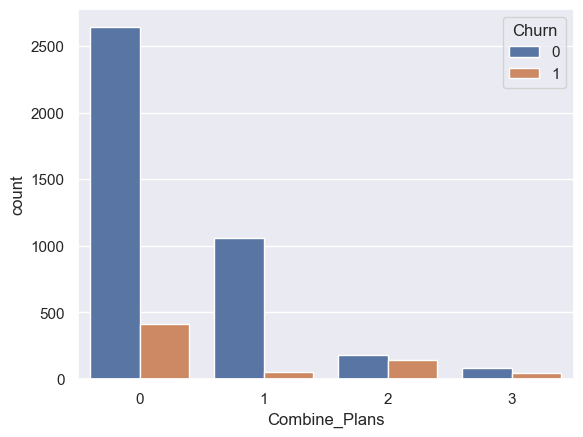

In [65]:
sns.countplot(x = df.Combine_Plans, hue = df.Churn)

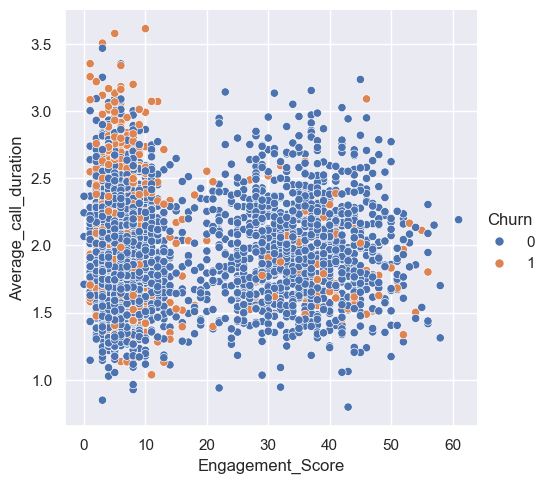

In [66]:
sns.relplot(x = df['Engagement_Score'], y = df['Average_call_duration'], data  = df, hue = df['Churn'])

In [67]:
created_features.describe()

Combine_Plans  Engagement_Score  Total_charges   Total_mint  \
count    4617.000000       4617.000000    4617.000000  4617.000000   
mean        0.460905         13.850769      59.517390   591.779467   
std         0.741677         13.879512      10.366072    89.038048   
min         0.000000          0.000000      22.930000   284.300000   
25%         0.000000          5.000000      52.480000   532.100000   
50%         0.000000          7.000000      59.530000   592.700000   
75%         1.000000         22.000000      66.470000   651.100000   
max         3.000000         61.000000      96.150000   885.000000   

        Total_call  Average_call_duration  Charge_Difference  \
count  4617.000000            4617.000000        4617.000000   
mean    304.612086               1.967618          53.965538   
std      34.262059               0.373355          10.383584   
min     191.000000               0.798596          16.710000   
25%     282.000000               1.708146          46.790000   
50%     305.000000               1.942230          54.000000   
75%     328.000000               2.198020          60.770000   
max     416.000000               3.612245          89.370000   

       charges_Minutes_ratio  Call Density        Churn  
count            4615.000000   4617.000000  4617.000000  
mean                0.170003     10.020807     0.142084  
std                 0.000026      0.854062     0.349174  
min                 0.169231      7.704666     0.000000  
25%                 0.169989      9.428571     0.000000  
50%                 0.170004      9.946728     0.000000  
75%                 0.170017     10.530958     0.000000  
max                 0.170513     14.936441     1.000000

In [68]:
created_features.corr()

Combine_Plans  Engagement_Score  Total_charges  \
Combine_Plans               1.000000          0.566749       0.034157   
Engagement_Score            0.566749          1.000000       0.014919   
Total_charges               0.034157          0.014919       1.000000   
Total_mint                  0.024825          0.015205       0.889439   
Total_call                  0.007856          0.009115       0.015228   
Average_call_duration       0.015228          0.006121       0.697592   
Charge_Difference           0.029372          0.013835       0.989705   
charges_Minutes_ratio       0.002287         -0.029349      -0.034308   
Call Density               -0.025218         -0.005593      -0.523399   
Churn                       0.139403         -0.083283       0.229438   

                       Total_mint  Total_call  Average_call_duration  \
Combine_Plans            0.024825    0.007856               0.015228   
Engagement_Score         0.015205    0.009115               0.006121   
Total_charges            0.889439    0.015228               0.697592   
Total_mint               1.000000    0.020993               0.781623   
Total_call               0.020993    1.000000              -0.592759   
Average_call_duration    0.781623   -0.592759               1.000000   
Charge_Difference        0.884917    0.014667               0.694268   
charges_Minutes_ratio   -0.019310   -0.017227              -0.006610   
Call Density            -0.089336    0.004830              -0.074697   
Churn                    0.198725    0.003395               0.154229   

                       Charge_Difference  charges_Minutes_ratio  Call Density  \
Combine_Plans                   0.029372               0.002287     -0.025218   
Engagement_Score                0.013835              -0.029349     -0.005593   
Total_charges                   0.989705              -0.034308     -0.523399   
Total_mint                      0.884917              -0.019310     -0.089336   
Total_call                      0.014667              -0.017227      0.004830   
Average_call_duration           0.694268              -0.006610     -0.074697   
Charge_Difference               1.000000              -0.032990     -0.509812   
charges_Minutes_ratio          -0.032990               1.000000      0.029674   
Call Density                   -0.509812               0.029674      1.000000   
Churn                           0.219770              -0.018215     -0.089701   

                          Churn  
Combine_Plans          0.139403  
Engagement_Score      -0.083283  
Total_charges          0.229438  
Total_mint             0.198725  
Total_call             0.003395  
Average_call_duration  0.154229  
Charge_Difference      0.219770  
charges_Minutes_ratio -0.018215  
Call Density          -0.089701  
Churn                  1.000000

# Insights :

1. **Combine_Plans vs. Engagement_Score**:
   - Customers who combine plans tend to have higher engagement scores.

2. **Total_charges vs. Total_mint**:
   - Total charges and total minutes have a strong positive correlation.
   - As total minutes increase, total charges also tend to increase.

3. **Total_charges vs. Average_call_duration**:
   - Total charges are highly correlated with average call duration.
   - Longer average call durations may lead to higher charges.

4. **Charge_Difference vs. Total_charges**:
   - Charge difference (e.g., overcharges or undercharges) is strongly correlated with total charges.
   - Customers with significant charge differences may have higher total charges.

5. **Call Density vs. Total_charges**:
   - Call density (calls per unit time) has a negative correlation with total charges.
   - Higher call density is associated with lower total charges.

6. **Churn vs. Combine_Plans**:
   - Churn (whether a customer leaves) has a moderate positive correlation with combining plans.
   - Customers who combine plans are slightly more likely to churn.

7. **Average_call_duration vs. Churn**:
   - Customers making longer calls might exhibit lower churn rates.

8. **Charge_Difference vs. Churn**:
   - Investigate reasons behind discrepancies between charges and minutes to mitigate churn risks.

9. **Call Density vs. Churn**:
   - Assess impact of call density on churn.

10. **Engagement_Score vs. Churn**:
    - Prioritize retaining customers with higher engagement scores to reduce churn.

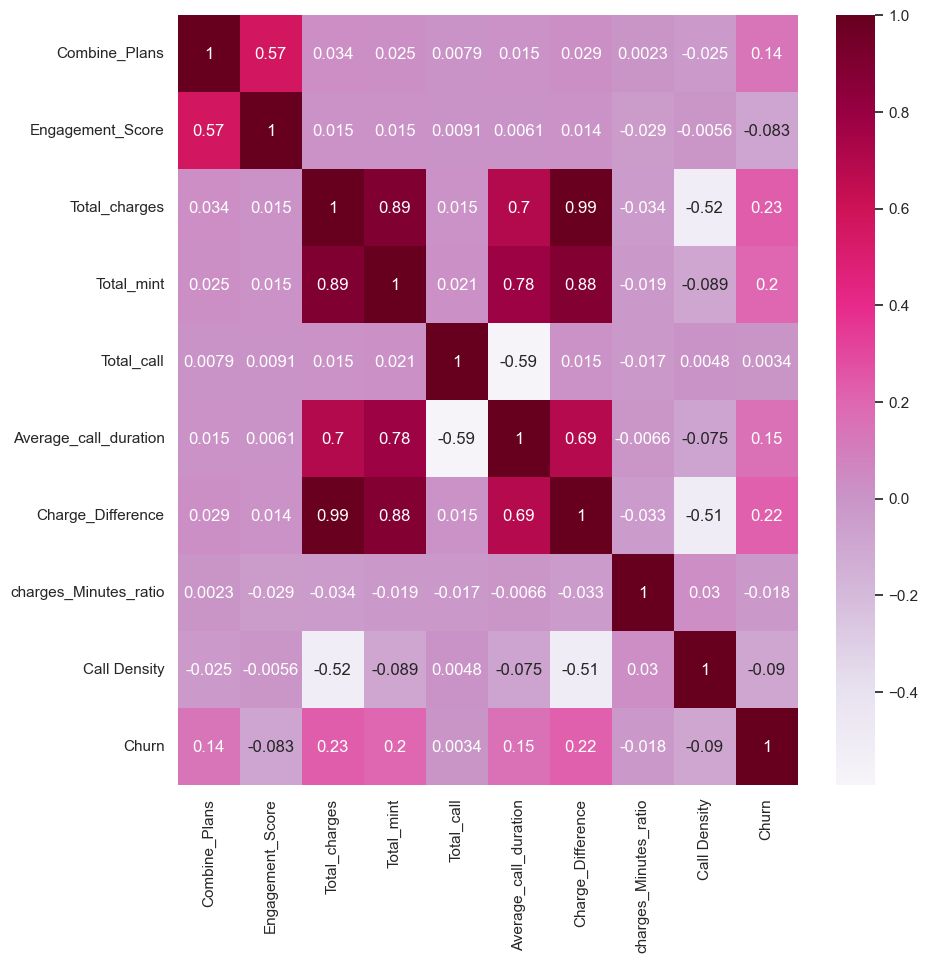

In [69]:
corr_mat = created_features.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr_mat, annot=True, cmap='PuRd')
plt.show()

# Data Preprocessing :

In [70]:
df.isnull().sum()

State                    0
Account Length           0
Area Code                0
Phone                    0
International_Plan       0
Vmail_Plan               0
Vmail_Message            0
Day_Mins                 0
Day_Calls                0
Day_Charge               0
Eve_Mins                 0
Eve_Calls                0
Eve_Charge               0
Night_Mins               0
Night_Calls              0
Night_Charge             0
International_Mins       0
International_calls      0
International_Charge     0
CustServ_Calls           0
Churn                    0
Combine_Plans            0
Total_mint               0
Total_charges            0
Total_call               0
Average_call_duration    0
Engagement_Score         0
Charge_Difference        0
charges_Minutes_ratio    2
Call Density             0
dtype: int64

In [71]:
df.loc[df['charges_Minutes_ratio'].isnull() == True, 'charges_Minutes_ratio'] = np.mean(df.charges_Minutes_ratio)

# Encoding of Categorical data:

In [72]:
categorical_column = []

for column in df.columns:
    if df[column].dtypes == object and len(df[column].unique())  <=200:
        categorical_column.append(column)
        print(f"Feature :{column}")
        print(f"{column} :{df[column].unique()}")
        print("****"*10)
        print()

Feature :State
State :['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
****************************************

Feature :International_Plan
International_Plan :[' no' ' yes']
****************************************

Feature :Vmail_Plan
Vmail_Plan :[' yes' ' no']
****************************************



1. **State:**
   - Nominal: States do not have inherent order or rank. Each state is considered distinct without any implied hierarchy.

2. **International_Plan:**
   - Nominal: The "International_Plan" feature consists of two categories ("yes" and "no"), without any inherent order.

3. **Vmail_Plan:**
   - Nominal: Similarly, the "Vmail_Plan" feature contains two categories ("yes" and "no"), without any implied order.

These features are all nominal because their categories are not ranked or ordered in any meaningful way.

In [73]:
nominal_feat = ['International_Plan', 'Vmail_Plan']

In [74]:
df = pd.get_dummies(df, columns=nominal_feat, drop_first = True)

In [75]:
df.drop(labels=['State','Phone'], axis = 1, inplace  = True)

# Outlier Handling:

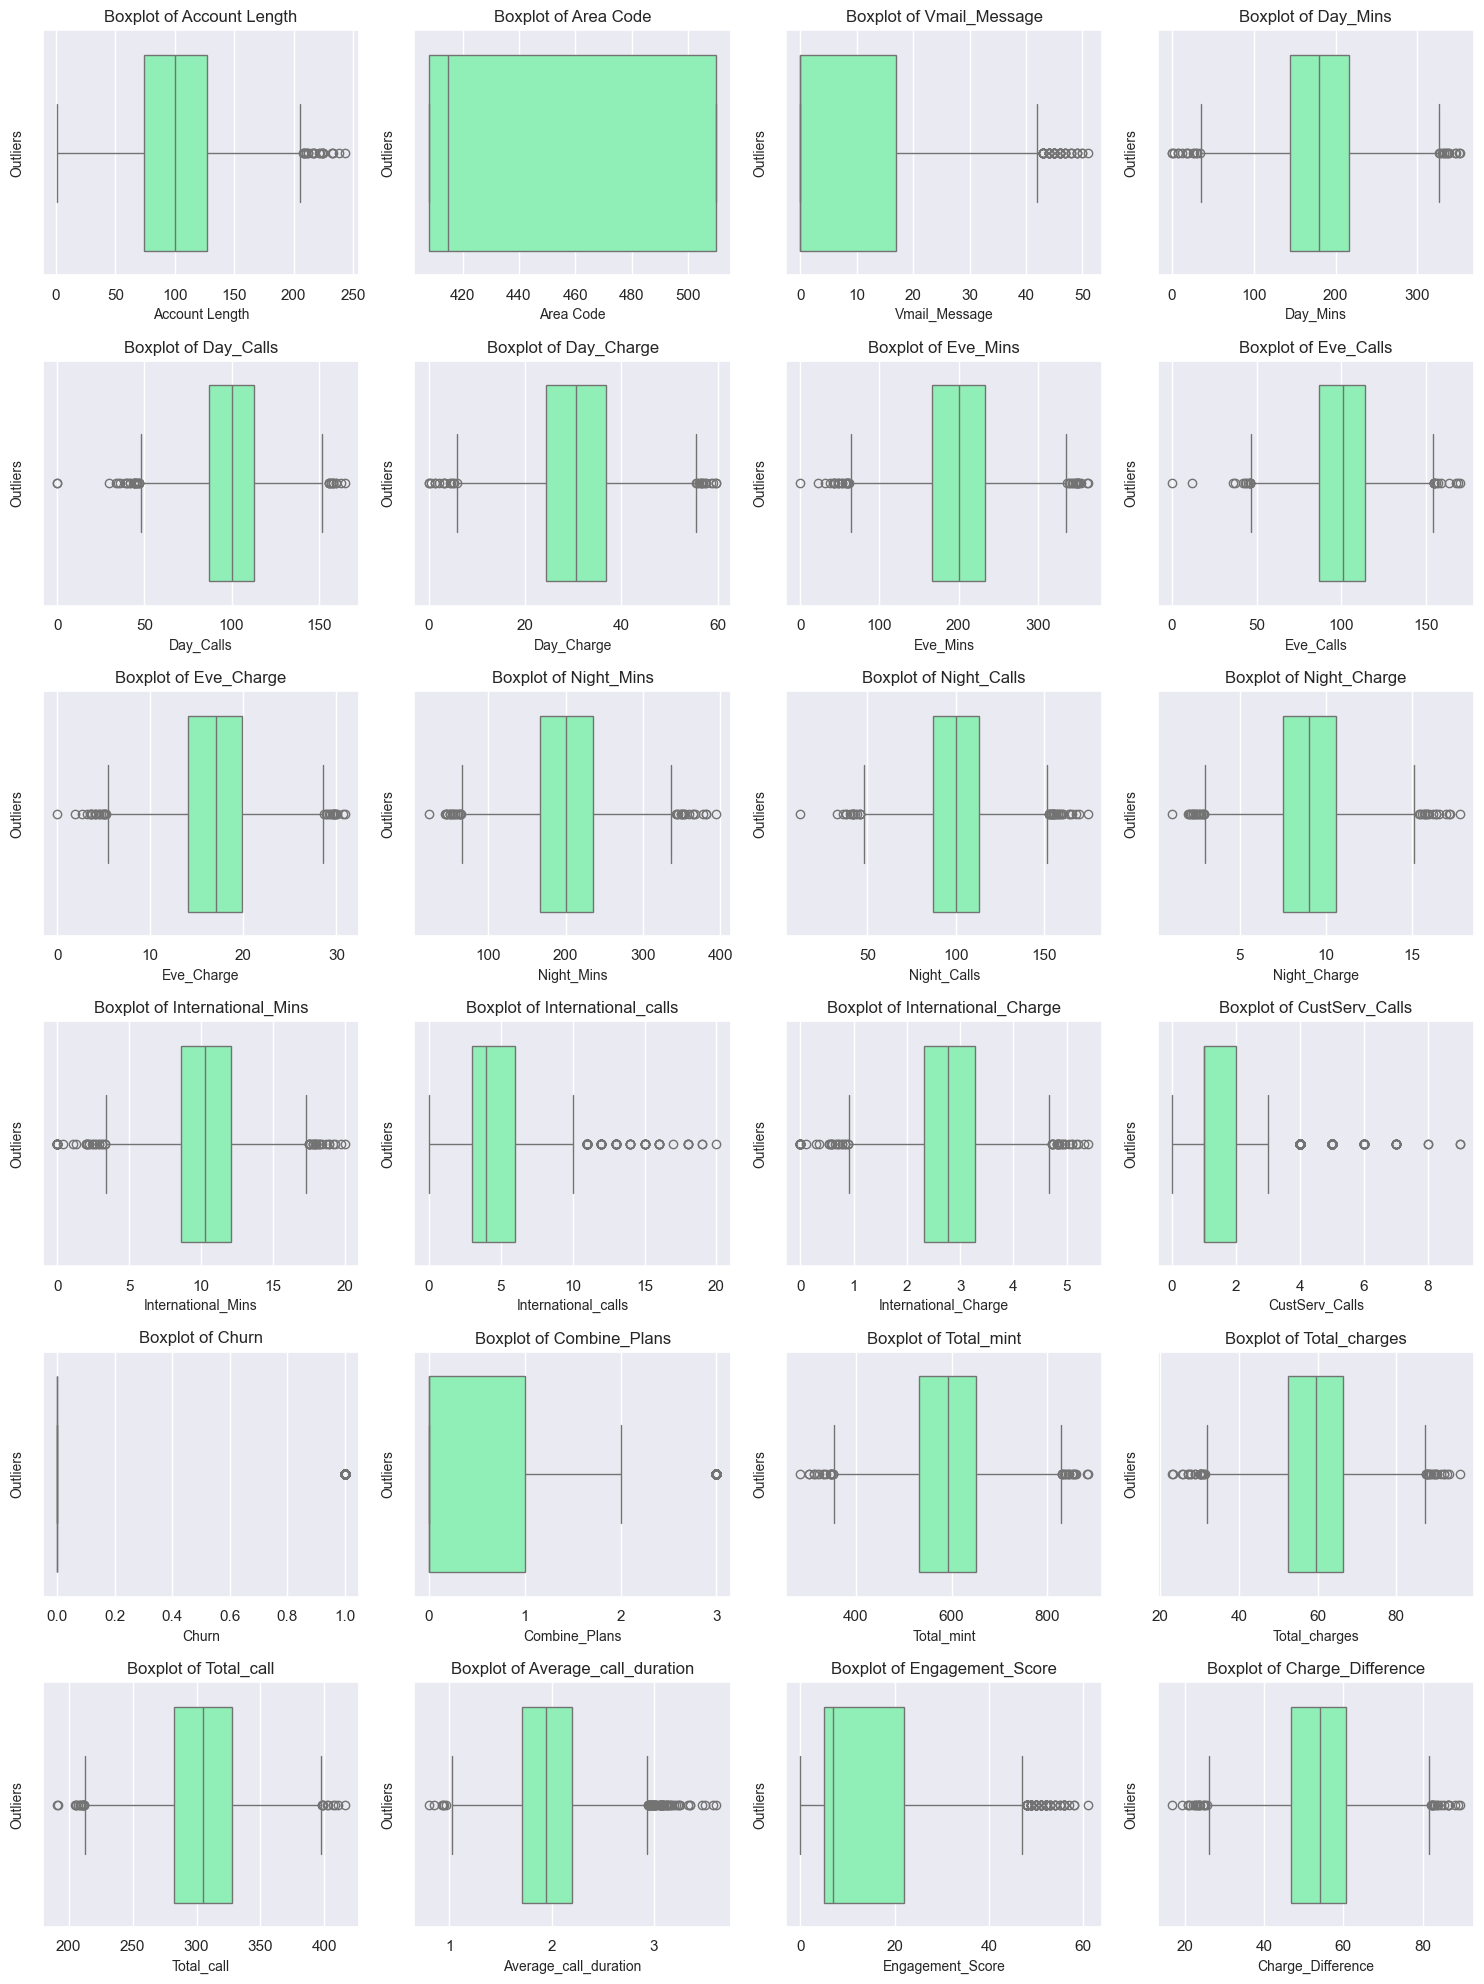

In [76]:
plt.figure(figsize = (15, 20), facecolor = 'white')
plotnumber = 1
for column in df.columns:
    if plotnumber <= 24:
        plt.subplot(6,4, plotnumber)
        sns.boxplot(x = df[column], palette = 'rainbow')
        plt.title(f"Boxplot of {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Outliers', fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [77]:
outlier_info = {}

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR
    outlier_info[column] = {
        'Min_limit':min_limit,
        'Max_limit':max_limit,
        'IQR':IQR
    }

print()
for column, info in outlier_info.items():
    print(f"Max_limit & Min_limit & IQR : {column}")
    print(f"column : {column}")
    print(f"Min_limit : {info['Min_limit']}")
    print(f"Max_limit : {info['Max_limit']}")
    print(f"IQR : {info['IQR']}")
    print("**"*10)
    print()


Max_limit & Min_limit & IQR : Account Length
column : Account Length
Min_limit : -5.5
Max_limit : 206.5
IQR : 53.0
********************

Max_limit & Min_limit & IQR : Area Code
column : Area Code
Min_limit : 255.0
Max_limit : 663.0
IQR : 102.0
********************

Max_limit & Min_limit & IQR : Vmail_Message
column : Vmail_Message
Min_limit : -25.5
Max_limit : 42.5
IQR : 17.0
********************

Max_limit & Min_limit & IQR : Day_Mins
column : Day_Mins
Min_limit : 34.049999999999955
Max_limit : 326.45000000000005
IQR : 73.10000000000002
********************

Max_limit & Min_limit & IQR : Day_Calls
column : Day_Calls
Min_limit : 48.0
Max_limit : 152.0
IQR : 26.0
********************

Max_limit & Min_limit & IQR : Day_Charge
column : Day_Charge
Min_limit : 5.785
Max_limit : 55.504999999999995
IQR : 12.43
********************

Max_limit & Min_limit & IQR : Eve_Mins
column : Eve_Mins
Min_limit : 63.750000000000014
Max_limit : 336.15
IQR : 68.1
********************

Max_limit & Min_limit 

In [78]:
def identify_outlier(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1  - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    outliers = df[(df[column] < min_limit) | (df[column] > max_limit)]
    return outliers

In [79]:
for column in df.columns:
    outliers = identify_outlier(column)
    outlier_count = len(outliers)
    if outlier_count >= 0:
        print(f"Features {column} has {outlier_count} has outliers")
        print("**"*10)
        print()

Features Account Length has 23 has outliers
********************

Features Area Code has 0 has outliers
********************

Features Vmail_Message has 51 has outliers
********************

Features Day_Mins has 27 has outliers
********************

Features Day_Calls has 34 has outliers
********************

Features Day_Charge has 27 has outliers
********************

Features Eve_Mins has 36 has outliers
********************

Features Eve_Calls has 25 has outliers
********************

Features Eve_Charge has 36 has outliers
********************

Features Night_Mins has 36 has outliers
********************

Features Night_Calls has 42 has outliers
********************

Features Night_Charge has 36 has outliers
********************

Features International_Mins has 65 has outliers
********************

Features International_calls has 107 has outliers
********************

Features International_Charge has 65 has outliers
********************

Features CustServ_Calls has 368 has outl

In [80]:
continous_df = df[['Account Length', 'Area Code', 'Vmail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'International_Mins','Combine_Plans', 'Engagement_Score',
       'International_Charge','Total_charges', 'Total_mint', 'Total_call','Charge_Difference','charges_Minutes_ratio','Average_call_duration','Call Density']]

In [81]:
for column in continous_df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    df[column] = np.where((df[column] < min_limit) | (df[column] > max_limit),
                         df[column].mean(), df[column])

# Scaling of data:

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
sc = StandardScaler()

In [84]:
l1 = df[['Churn','International_Plan_ yes','Vmail_Plan_ yes']]
x = df.drop(labels =l1 , axis= 1)

In [85]:
scaled = sc.fit_transform(x)


In [86]:
df2 = pd.DataFrame(scaled, columns = x.columns)

In [87]:
df3 = pd.concat([df2, l1], axis = 1)

In [88]:
df3.head()

Account Length  Area Code  Vmail_Message  Day_Mins  Day_Calls  Day_Charge  \
0        0.722720  -0.521392       1.351459  1.609682   0.511573    1.609970   
1        0.179710  -0.521392       1.428400 -0.359631   1.190031   -0.359920   
2        0.955439  -0.521392      -0.572075  1.196792   0.720329    1.196964   
3       -0.415015  -0.686941      -0.572075  2.262314  -1.523803    2.262496   
4       -0.647733  -0.521392      -0.572075 -0.262592   0.668140   -0.262545   

   Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  Night_Calls  Night_Charge  \
0 -0.065280  -0.062273   -0.065095    0.905239    -0.461973      0.904496   
1 -0.104269   0.145150   -0.103721    1.104535     0.166412      1.105388   
2 -1.628923   0.508140   -1.629468   -0.781585     0.218777     -0.780259   
3 -0.003122  -0.632686   -0.003123   -0.076858    -0.566703     -0.077136   
4 -1.072825   1.130409   -1.071798   -0.282318     1.108988     -0.282594   

   International_Mins  International_calls  International_Charge  \
0           -0.126926            -0.583487             -0.127700   
1            1.325692            -0.583487              1.326554   
2            0.736793             0.230398              0.730310   
3           -1.461764             1.044284             -1.465614   
4           -0.087666            -0.583487             -0.084072   

   CustServ_Calls  Combine_Plans  Total_mint  Total_charges  Total_call  \
0       -0.433885       0.998342    1.453045       1.607800   -0.051199   
1       -0.433885       0.998342    0.386568      -0.028016    0.814979   
2       -1.199068      -0.644106   -0.608037       0.277697    0.844847   
3        0.331298       2.640789   -0.313597       0.729752   -1.484873   
4        1.096480       2.640789   -0.925662      -0.744688    1.621421   

   Average_call_duration  Engagement_Score  Charge_Difference  \
0               1.185242          1.229019           1.617777   
1              -0.205579          1.306596          -0.212514   
2              -0.962445         -0.632837           0.174125   
3               0.748060         -0.322528           0.926423   
4              -1.519033         -0.555259          -0.733028   

   charges_Minutes_ratio  Call Density  Churn  International_Plan_ yes  \
0               0.437951     -0.628170      0                        0   
1              -0.881860      0.725030      0                        0   
2               0.265289     -1.688799      0                        0   
3               0.179676     -1.949281      0                        1   
4               0.141728     -0.198276      0                        1   

   Vmail_Plan_ yes  
0                1  
1                1  
2                0  
3                0  
4                0

In [89]:
df3.columns

Index(['Account Length', 'Area Code', 'Vmail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'International_Mins',
       'International_calls', 'International_Charge', 'CustServ_Calls',
       'Combine_Plans', 'Total_mint', 'Total_charges', 'Total_call',
       'Average_call_duration', 'Engagement_Score', 'Charge_Difference',
       'charges_Minutes_ratio', 'Call Density', 'Churn',
       'International_Plan_ yes', 'Vmail_Plan_ yes'],
      dtype='object')

### Feature_selection:

In [90]:
l2= df[['Account Length', 'Area Code']]

df4 =df3.drop(labels=l2, axis = 1)

In [91]:
df4.head()

Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0       1.351459  1.609682   0.511573    1.609970 -0.065280  -0.062273   
1       1.428400 -0.359631   1.190031   -0.359920 -0.104269   0.145150   
2      -0.572075  1.196792   0.720329    1.196964 -1.628923   0.508140   
3      -0.572075  2.262314  -1.523803    2.262496 -0.003122  -0.632686   
4      -0.572075 -0.262592   0.668140   -0.262545 -1.072825   1.130409   

   Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0   -0.065095    0.905239    -0.461973      0.904496           -0.126926   
1   -0.103721    1.104535     0.166412      1.105388            1.325692   
2   -1.629468   -0.781585     0.218777     -0.780259            0.736793   
3   -0.003123   -0.076858    -0.566703     -0.077136           -1.461764   
4   -1.071798   -0.282318     1.108988     -0.282594           -0.087666   

   International_calls  International_Charge  CustServ_Calls  Combine_Plans  \
0            -0.583487             -0.127700       -0.433885       0.998342   
1            -0.583487              1.326554       -0.433885       0.998342   
2             0.230398              0.730310       -1.199068      -0.644106   
3             1.044284             -1.465614        0.331298       2.640789   
4            -0.583487             -0.084072        1.096480       2.640789   

   Total_mint  Total_charges  Total_call  Average_call_duration  \
0    1.453045       1.607800   -0.051199               1.185242   
1    0.386568      -0.028016    0.814979              -0.205579   
2   -0.608037       0.277697    0.844847              -0.962445   
3   -0.313597       0.729752   -1.484873               0.748060   
4   -0.925662      -0.744688    1.621421              -1.519033   

   Engagement_Score  Charge_Difference  charges_Minutes_ratio  Call Density  \
0          1.229019           1.617777               0.437951     -0.628170   
1          1.306596          -0.212514              -0.881860      0.725030   
2         -0.632837           0.174125               0.265289     -1.688799   
3         -0.322528           0.926423               0.179676     -1.949281   
4         -0.555259          -0.733028               0.141728     -0.198276   

   Churn  International_Plan_ yes  Vmail_Plan_ yes  
0      0                        0                1  
1      0                        0                1  
2      0                        0                0  
3      0                        1                0  
4      0                        1                0

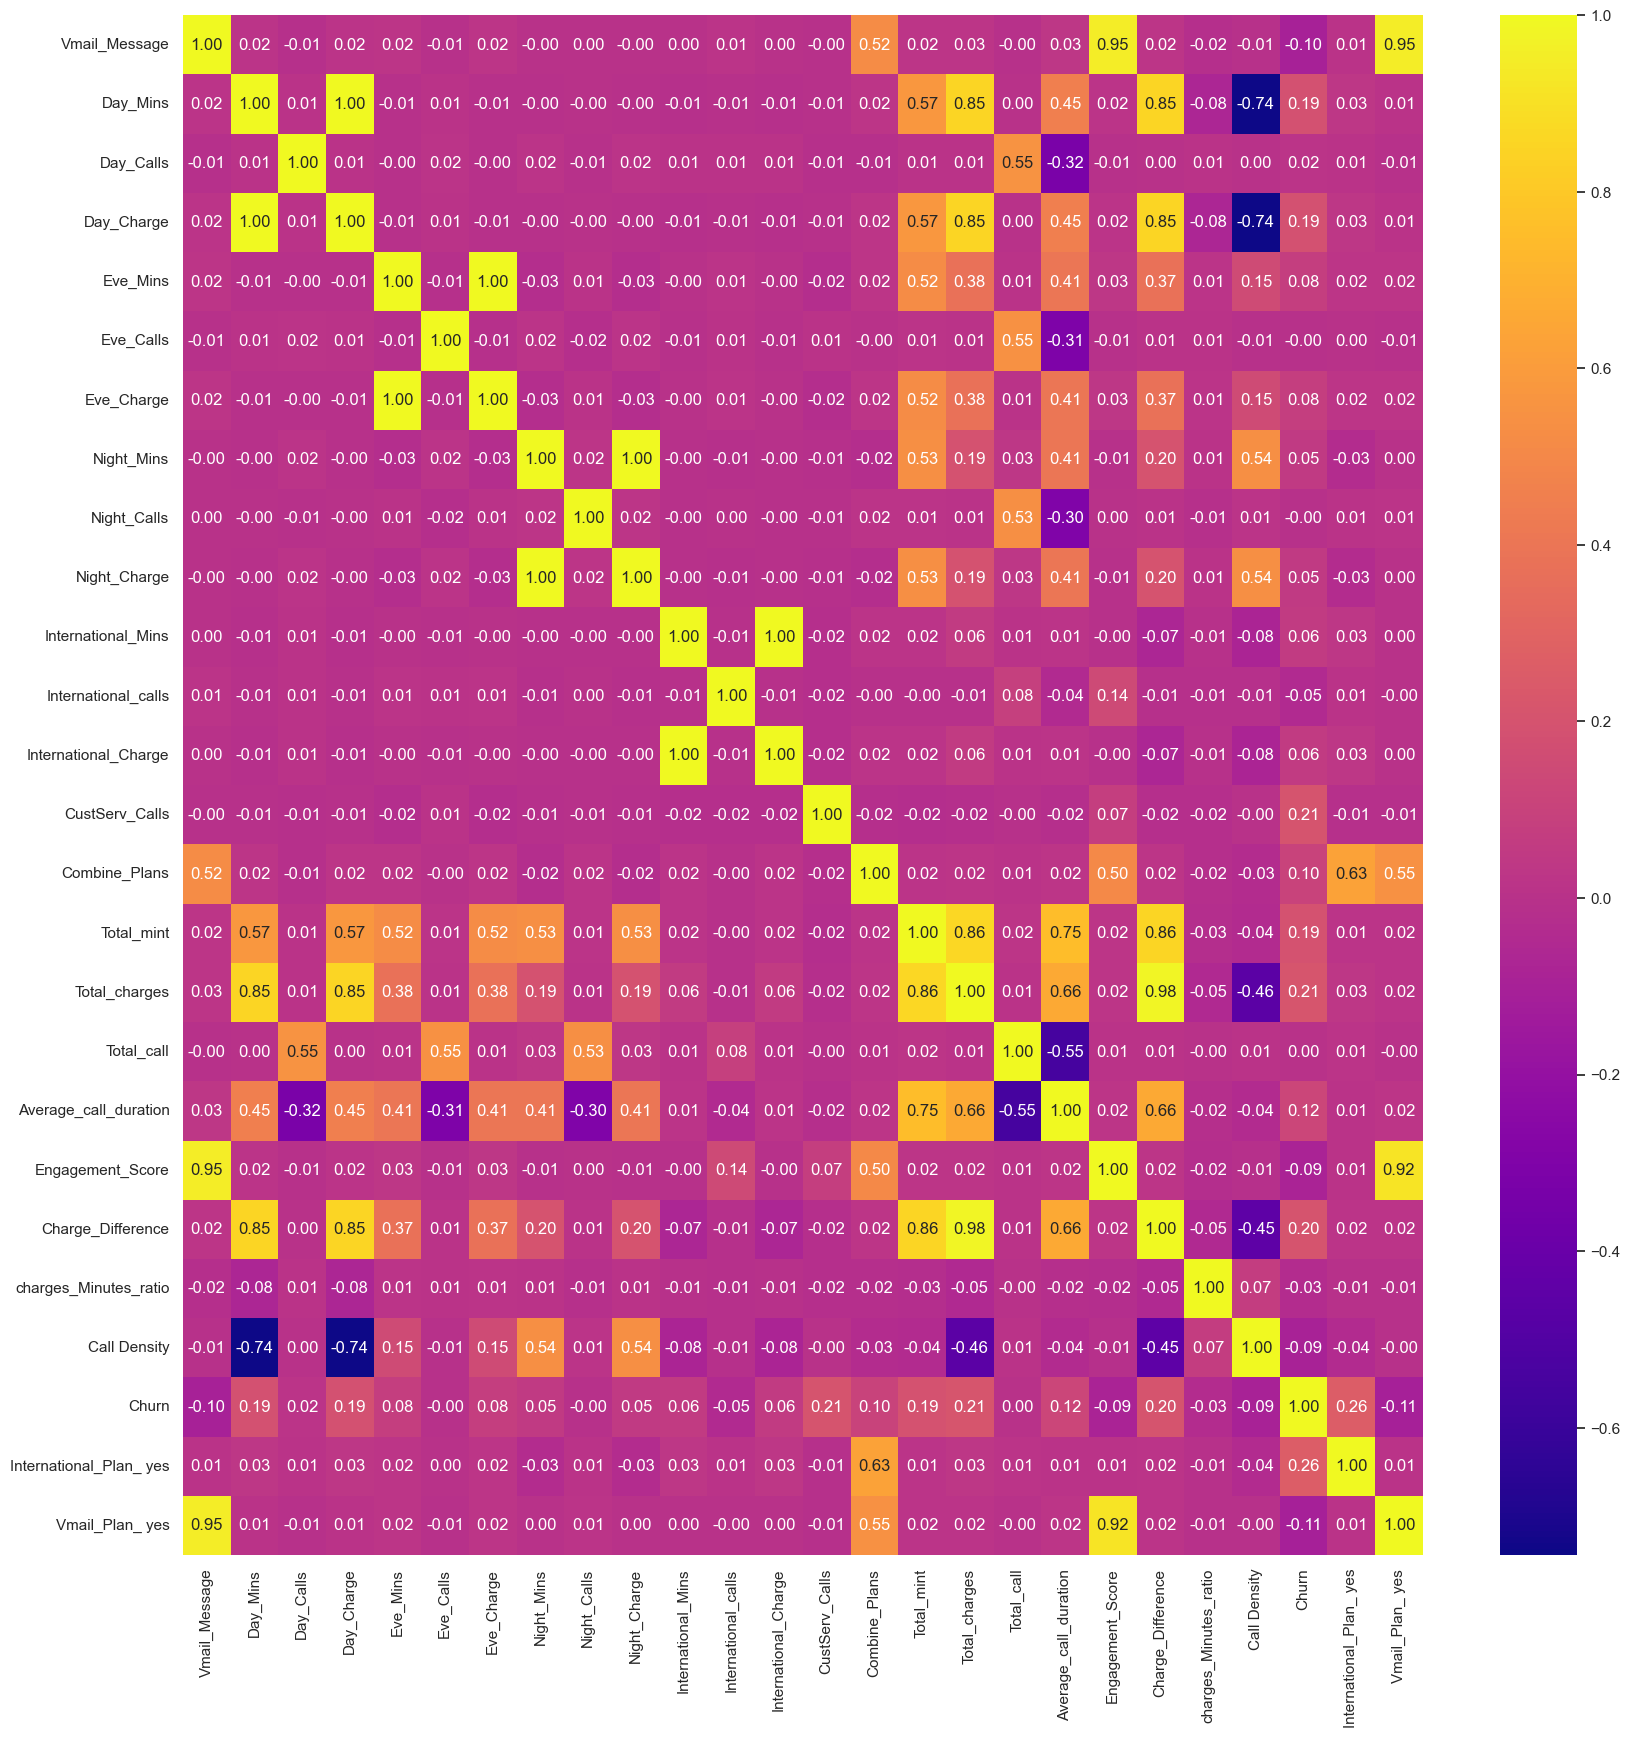

In [92]:
plt.figure(figsize = (20, 20), facecolor = 'white')
sns.heatmap(df4.corr(), annot = True, fmt = '.2f', cmap = 'plasma')
plt.show()

# Model Building:

In [93]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [94]:
x = df4.drop('Churn', axis = 1)

In [95]:
x.head()

Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0       1.351459  1.609682   0.511573    1.609970 -0.065280  -0.062273   
1       1.428400 -0.359631   1.190031   -0.359920 -0.104269   0.145150   
2      -0.572075  1.196792   0.720329    1.196964 -1.628923   0.508140   
3      -0.572075  2.262314  -1.523803    2.262496 -0.003122  -0.632686   
4      -0.572075 -0.262592   0.668140   -0.262545 -1.072825   1.130409   

   Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0   -0.065095    0.905239    -0.461973      0.904496           -0.126926   
1   -0.103721    1.104535     0.166412      1.105388            1.325692   
2   -1.629468   -0.781585     0.218777     -0.780259            0.736793   
3   -0.003123   -0.076858    -0.566703     -0.077136           -1.461764   
4   -1.071798   -0.282318     1.108988     -0.282594           -0.087666   

   International_calls  International_Charge  CustServ_Calls  Combine_Plans  \
0            -0.583487             -0.127700       -0.433885       0.998342   
1            -0.583487              1.326554       -0.433885       0.998342   
2             0.230398              0.730310       -1.199068      -0.644106   
3             1.044284             -1.465614        0.331298       2.640789   
4            -0.583487             -0.084072        1.096480       2.640789   

   Total_mint  Total_charges  Total_call  Average_call_duration  \
0    1.453045       1.607800   -0.051199               1.185242   
1    0.386568      -0.028016    0.814979              -0.205579   
2   -0.608037       0.277697    0.844847              -0.962445   
3   -0.313597       0.729752   -1.484873               0.748060   
4   -0.925662      -0.744688    1.621421              -1.519033   

   Engagement_Score  Charge_Difference  charges_Minutes_ratio  Call Density  \
0          1.229019           1.617777               0.437951     -0.628170   
1          1.306596          -0.212514              -0.881860      0.725030   
2         -0.632837           0.174125               0.265289     -1.688799   
3         -0.322528           0.926423               0.179676     -1.949281   
4         -0.555259          -0.733028               0.141728     -0.198276   

   International_Plan_ yes  Vmail_Plan_ yes  
0                        0                1  
1                        0                1  
2                        0                0  
3                        1                0  
4                        1                0

In [96]:
y = df.Churn

In [97]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size = 0.20, random_state=42)

In [99]:
x_train.shape, x_test.shape

((3693, 25), (924, 25))

In [100]:
y_train.shape, y_test.shape

((3693,), (924,))

In [101]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=42))

In [102]:
sel_.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=50,
                                                 random_state=42))

In [103]:
sel_.get_support()

array([False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True, False])

In [104]:
selected_feat = x_train.columns[(sel_.get_support())]

In [105]:
selected_feat

Index(['Day_Mins', 'Day_Charge', 'International_calls', 'CustServ_Calls',
       'Combine_Plans', 'Total_mint', 'Total_charges', 'Engagement_Score',
       'Charge_Difference', 'International_Plan_ yes'],
      dtype='object')

In [106]:
x2 = df4[['Day_Mins', 'Day_Charge', 'International_calls', 'CustServ_Calls',
       'Combine_Plans', 'Total_mint', 'Total_charges', 'Engagement_Score',
       'Charge_Difference', 'International_Plan_ yes']]

In [107]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()


x_sm, y_sm  = sm.fit_resample(x2, y)

In [108]:
x_sm.shape, y_sm.shape

((7922, 10), (7922,))

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, stratify=y_sm, test_size = 0.20, random_state = 42 )

In [110]:
x_train.shape, x_test.shape

((6337, 10), (1585, 10))

# LGBMCLASSIFIER:

In [111]:
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3169, number of negative: 3168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 6337, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500079 -> initscore=0.000316
[LightGBM] [Info] Start training from score 0.000316


LGBMClassifier()

In [112]:
y_lg_pre = lgb.predict(x_test)

In [113]:
f1_score(y_test, y_lg_pre)

0.9710982658959537

In [114]:
cr = classification_report(y_test, y_lg_pre)
print(f"Classification_report of LGBMClassifier : \n{cr}")

Classification_report of LGBMClassifier : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       793
           1       0.99      0.95      0.97       792

    accuracy                           0.97      1585
   macro avg       0.97      0.97      0.97      1585
weighted avg       0.97      0.97      0.97      1585



# Hyperparameter Tuning:

In [115]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

param_grid = {
    'num_leaves': [15, 31, 63, 127],  # Varying the number of leaves
    'max_depth': [3, 5, 7, -1],  # -1 means no limit (full tree)
    'min_child_samples': [10, 20, 50, 100],  # Minimum samples required in a leaf
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of training data
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0.01, 0.1, 0.5, 1.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0],  # L2 regularization term
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
}

# Initialize LGBM classifier (you can adjust other hyperparameters as needed)
clf = lgb.LGBMClassifier()

# Create GridSearchCV object
grid_lg = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv=5, verbose=2, scoring='f1', refit=True)
# grid_lg.fit(x_train, y_train)


In [116]:
# grid_lg.best_params_

In [117]:
lgb = LGBMClassifier(subsample = 1.0,
reg_lambda = 0.5,
reg_alpha = 0.1,
num_leaves = 63,
min_data_in_leaf = 30,
min_child_samples = 20,
max_depth = 7,
lambda_l2 = 1,
lambda_l1 = 1.5,
colsample_bytree = 0.6)

In [118]:
lgb.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 3169, number of negative: 3168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2080
[Ligh

LGBMClassifier(colsample_bytree=0.6, lambda_l1=1.5, lambda_l2=1, max_depth=7,
               min_data_in_leaf=30, num_leaves=63, reg_alpha=0.1,
               reg_lambda=0.5)

In [119]:
y_lgb = lgb.predict(x_test)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.5 will be ignored. Current value: lambda_l2=1


In [120]:
f1_score(y_test, y_lgb)

0.9671179883945842

In [121]:
lgb_eval_score = {
    "LGBMClassifier f1_score ":f1_score(y_test, y_lgb),
    "LGBMClassifier accuracy_score ":accuracy_score(y_test, y_lgb),
    "LGBMClassifier recall_score ":recall_score(y_test, y_lgb),
    "LGBMClassifier precision_score ":precision_score(y_test, y_lgb)
}

for key, val in lgb_eval_score.items():
    print("\t", key," : ", val)
    print("\t","=="*10)

	 LGBMClassifier f1_score   :  0.9671179883945842
	 LGBMClassifier accuracy_score   :  0.9678233438485805
	 LGBMClassifier recall_score   :  0.946969696969697
	 LGBMClassifier precision_score   :  0.9881422924901185


In [122]:
cr = classification_report(y_test, y_lgb)
print(f"Classification report of  LGBMClassifier :\n{cr}")

Classification report of  LGBMClassifier :
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       793
           1       0.99      0.95      0.97       792

    accuracy                           0.97      1585
   macro avg       0.97      0.97      0.97      1585
weighted avg       0.97      0.97      0.97      1585



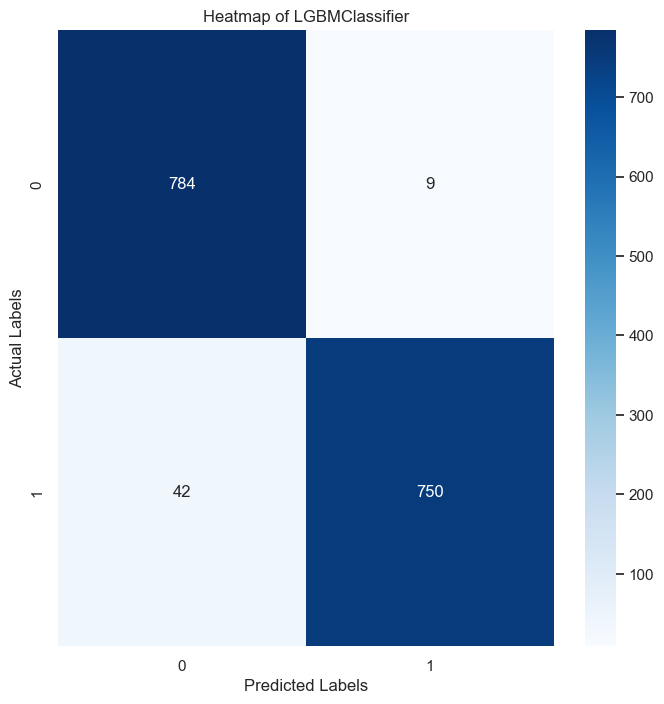

In [123]:
# Calculate the total number of instances
plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, y_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set title and axis labels
plt.title("Heatmap of LGBMClassifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

# Show the modified heatmap
plt.show()


# DecisionTreeClassifier:

In [124]:
dt = DecisionTreeClassifier()

In [125]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [126]:
y_dt = dt.predict(x_test)

In [127]:
f1_score(y_test, y_dt)

0.9235588972431078

In [128]:
cr = classification_report(y_test, y_dt)
print(f"DecisionTree Classification Report :\n{cr}")

DecisionTree Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       793
           1       0.92      0.93      0.92       792

    accuracy                           0.92      1585
   macro avg       0.92      0.92      0.92      1585
weighted avg       0.92      0.92      0.92      1585



# Hyperparameter Tuning for DecisionTreeClassifier:

In [129]:
params = {
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth':list(range(1, 31)),
    'min_samples_split':[2,3,4,5,10],
    'min_samples_leaf':list(range(1, 21))
}
dt = DecisionTreeClassifier()

grid_cv = GridSearchCV(estimator=dt, param_grid=params, cv = 5, verbose = 2, scoring = 'f1', refit = True)

In [130]:
# grid_cv.fit(x_train, y_train)

In [131]:
# print(f"Best params grid_search_cv : \n{grid_cv.best_params_}")
# print()
# print(f"Best score gridsearchCv : \n{grid_cv.best_score_}")
# print()
# print(f"Best estimator of gridsearchCV : \n{grid_cv.best_estimator_}")

In [132]:
dt = DecisionTreeClassifier(criterion= 'entropy', 
                            max_depth = 25, 
                            min_samples_leaf = 1, 
                            min_samples_split = 3, 
                            splitter = 'best')

In [133]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_split=3)

In [134]:
y_dt = dt.predict(x_test)

# Evaluation Metrics:

In [135]:
dt_eval_score = {
    "DecisionTreeClassifier f1_score ":f1_score(y_test,y_dt),
    "DecisionTreeClassifier Accuracy_score ":accuracy_score(y_test, y_dt),
    "DecisionTreeClassifier Recall_score ":recall_score(y_test, y_dt),
    "DecisionTreeClassifier Precision_score ":precision_score(y_test, y_dt)
}

for key, val in dt_eval_score.items():
    print("\t",key, ": ", val)
    print("\t","==="*10)
    print()

	 DecisionTreeClassifier f1_score  :  0.9329153605015674

	 DecisionTreeClassifier Accuracy_score  :  0.9324921135646688

	 DecisionTreeClassifier Recall_score  :  0.9393939393939394

	 DecisionTreeClassifier Precision_score  :  0.9265255292652553



In [136]:
cr = classification_report(y_test, y_dt)
print(f"classification report : \n{cr}")

classification report : 
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       793
           1       0.93      0.94      0.93       792

    accuracy                           0.93      1585
   macro avg       0.93      0.93      0.93      1585
weighted avg       0.93      0.93      0.93      1585



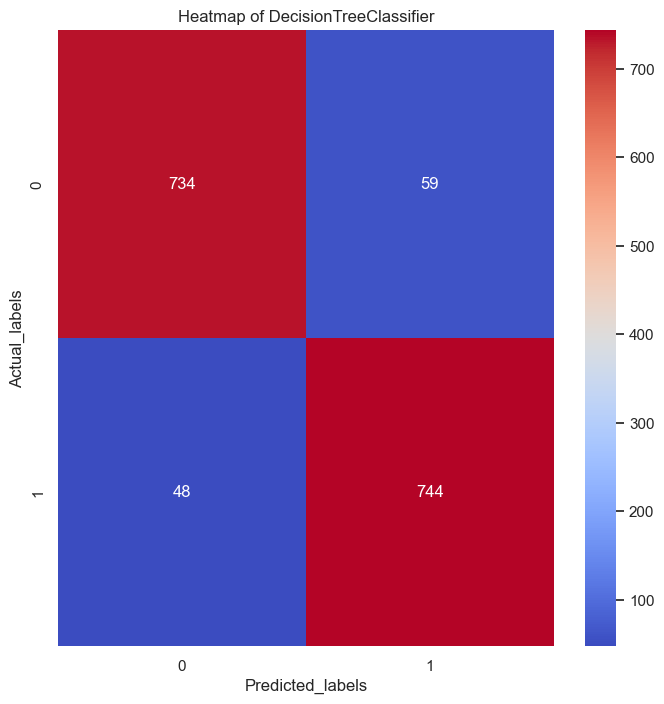

In [137]:
cm = confusion_matrix(y_test, y_dt)
plt.figure(figsize = (8, 8))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'coolwarm')
plt.title("Heatmap of DecisionTreeClassifier")
plt.xlabel("Predicted_labels")
plt.ylabel("Actual_labels")
plt.show()

# RandomForestClassifier:

In [138]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [139]:
y_pred = rf.predict(x_test)

In [140]:
f1_score(y_test, y_pred)

0.9641485275288092

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       793
           1       0.98      0.95      0.96       792

    accuracy                           0.96      1585
   macro avg       0.97      0.96      0.96      1585
weighted avg       0.97      0.96      0.96      1585



In [142]:
training_score = rf.predict(x_train)
f1_score(y_train, training_score)

1.0

# Hyper Parameter Tuning RandomforestClassifier :

In [143]:
params = {
    'n_estimators':[100, 200, 300, 400, 500],
    'max_features':['sqrt','log2'],
    'max_depth':[None, 10, 20, 30, 40, 50],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True, False]
}

rt = RandomForestClassifier()

# grid_rf = GridSearchCV(estimator=rt, param_grid=params, scoring = 'f1', cv = 5,verbose= 2, refit=True)
grid_rd = RandomizedSearchCV(estimator=rt, param_distributions=params, scoring = 'f1', verbose = 2, random_state=42)

In [144]:
# grid_rd.fit(x_train, y_train)

In [145]:
# print(f"classes of grid_search : {grid_rd.classes_}")
# print()
# print(f"Best params of grid_rd : {grid_rd.best_params_}")
# print()
# print(f"Best estimators : {grid_rd.best_estimator_}")

In [146]:
rf_cl = RandomForestClassifier(n_estimators =  500,
min_samples_split =  2, 
min_samples_leaf = 1, 
max_features = 'log2', 
max_depth = 20, 
bootstrap =False)

In [147]:
rf_cl.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       n_estimators=500)

In [148]:
y_rf_cl = rf_cl.predict(x_test)

In [149]:
f1_score(y_test, y_rf_cl)

0.9640102827763496

In [150]:
rf_eval_score = {
    "RandomForestCalssifier  f1_score ":f1_score(y_test, y_rf_cl),
    "RandomForestClassifier Accuracy_score ":accuracy_score(y_test, y_rf_cl),
    "RandomForestClassifier Recall_score ":recall_score(y_test, y_rf_cl),
    "RandomForestClassifier Precision_score ":precision_score(y_test, y_rf_cl)
}

for key, val in rf_eval_score.items():
    print("\t", key,": ", val)
    print("\t","=="*10)

	 RandomForestCalssifier  f1_score  :  0.9640102827763496
	 RandomForestClassifier Accuracy_score  :  0.9646687697160883
	 RandomForestClassifier Recall_score  :  0.946969696969697
	 RandomForestClassifier Precision_score  :  0.981675392670157


In [151]:
cr  = classification_report(y_test, y_rf_cl)
print(f"Classification report of RandomForestClassifier : \n{cr}")

Classification report of RandomForestClassifier : 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       793
           1       0.98      0.95      0.96       792

    accuracy                           0.96      1585
   macro avg       0.97      0.96      0.96      1585
weighted avg       0.97      0.96      0.96      1585



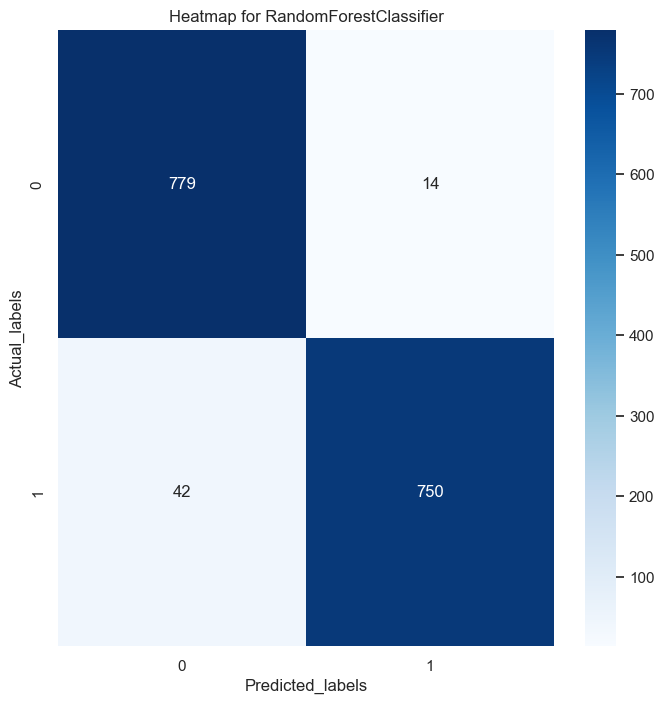

In [152]:
plt.figure(figsize = (8, 8))
cm = confusion_matrix(y_test, y_rf_cl)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Heatmap for RandomForestClassifier")
plt.xlabel("Predicted_labels")
plt.ylabel("Actual_labels")
plt.show()

# Voting_classifier:

In [153]:
clf1 = KNeighborsClassifier(n_neighbors=6)
clf2 = SVC(probability=True)
clf3 = XGBClassifier()
clf4 = GradientBoostingClassifier()
clf5  = AdaBoostClassifier()

In [154]:
vc = VotingClassifier(estimators=[('KN',clf1),('SVC',clf2),('XGB', clf3),('GBC', clf4),('AC', clf5)], voting='hard')

In [155]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('KN', KNeighborsClassifier(n_neighbors=6)),
                             ('SVC', SVC(probability=True)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('GBC', GradientBoostingClassifier()),
                             ('AC', AdaBoostClassifier())])

In [156]:
y_vc= vc.predict(x_test)

In [157]:
cr = classification_report(y_test, y_vc)
print(f"Classification report of voting Classifier :\n{cr}")

Classification report of voting Classifier :
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       793
           1       0.95      0.91      0.93       792

    accuracy                           0.93      1585
   macro avg       0.93      0.93      0.93      1585
weighted avg       0.93      0.93      0.93      1585



In [158]:
vc_eval_score = {
    "VotingClassifier f1_score ": round(f1_score(y_test, y_vc),2),
    "VotingClassifier accuracy_score ":round(accuracy_score(y_test, y_vc),2),
    "VotingClassifier recall_score  ":round(recall_score(y_test, y_vc),2),
    "VotingClassifier precision_score  ":round(precision_score(y_test, y_vc),2)
}

for key, val in vc_eval_score.items():
    print("\t", key, " :", val)
    print("\t","**"*10)

	 VotingClassifier f1_score   : 0.93
	 ********************
	 VotingClassifier accuracy_score   : 0.93
	 ********************
	 VotingClassifier recall_score    : 0.91
	 ********************
	 VotingClassifier precision_score    : 0.95
	 ********************


# Using ALL Variables:

In [159]:
# By using we will be able to create churn for all features 

In [160]:
x.head(4)

Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0       1.351459  1.609682   0.511573    1.609970 -0.065280  -0.062273   
1       1.428400 -0.359631   1.190031   -0.359920 -0.104269   0.145150   
2      -0.572075  1.196792   0.720329    1.196964 -1.628923   0.508140   
3      -0.572075  2.262314  -1.523803    2.262496 -0.003122  -0.632686   

   Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0   -0.065095    0.905239    -0.461973      0.904496           -0.126926   
1   -0.103721    1.104535     0.166412      1.105388            1.325692   
2   -1.629468   -0.781585     0.218777     -0.780259            0.736793   
3   -0.003123   -0.076858    -0.566703     -0.077136           -1.461764   

   International_calls  International_Charge  CustServ_Calls  Combine_Plans  \
0            -0.583487             -0.127700       -0.433885       0.998342   
1            -0.583487              1.326554       -0.433885       0.998342   
2             0.230398              0.730310       -1.199068      -0.644106   
3             1.044284             -1.465614        0.331298       2.640789   

   Total_mint  Total_charges  Total_call  Average_call_duration  \
0    1.453045       1.607800   -0.051199               1.185242   
1    0.386568      -0.028016    0.814979              -0.205579   
2   -0.608037       0.277697    0.844847              -0.962445   
3   -0.313597       0.729752   -1.484873               0.748060   

   Engagement_Score  Charge_Difference  charges_Minutes_ratio  Call Density  \
0          1.229019           1.617777               0.437951     -0.628170   
1          1.306596          -0.212514              -0.881860      0.725030   
2         -0.632837           0.174125               0.265289     -1.688799   
3         -0.322528           0.926423               0.179676     -1.949281   

   International_Plan_ yes  Vmail_Plan_ yes  
0                        0                1  
1                        0                1  
2                        0                0  
3                        1                0

In [161]:
x.shape

(4617, 25)

In [162]:
y.sample(4)

1476    0
1035    0
2739    0
725     0
Name: Churn, dtype: int64

In [163]:
Counter(y_sm)

Counter({0: 3961, 1: 3961})

In [164]:
x_sm, y_sm = sm.fit_resample(x,y)

In [165]:
x_train,x_test, y_train, y_test = train_test_split(x_sm,y_sm, stratify=y_sm, test_size =0.20, random_state = 42)

In [166]:
x_train.shape, x_test.shape

((6337, 25), (1585, 25))

In [167]:
y_train.shape, y_test.shape

((6337,), (1585,))

In [168]:
Counter(y_train)

Counter({1: 3169, 0: 3168})

## To enhance the efficiency and organization of executing machine learning models, it's advisable to employ a for loop for iterative model execution.

In [169]:
rf = RandomForestClassifier()
ad = AdaBoostClassifier()
an = MLPClassifier(
    activation = 'tanh',
    hidden_layer_sizes = (100,),
    learning_rate='constant',
    solver = 'sgd'
)

lg = LGBMClassifier(learning_rate=0.3,n_estimators=100, num_leaves = 20)
xgb = XGBClassifier()
gb = GradientBoostingClassifier()
lr= LogisticRegression()
svc= SVC(C = 0.1, gamma = 0.01, kernel='linear', random_state=42)
dt = DecisionTreeClassifier()
ct = CatBoostClassifier()
bn = BernoulliNB()

In [170]:
lst = [rf, ad, an, lg, xgb, gb, lr, svc,dt,ct,bn]

# acc = []
model = []

for i in lst:
    print("*"*20, i , "*"*20)
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    print(classification_report(y_test, y_pred))
    print()
    f1 = f1_score(y_test, y_pred)
    print("F1_score ",f1)
    print()
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy_score ",acc)
    print()
    print("_"*200)
    model.append(i)

******************** RandomForestClassifier() ********************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       793
           1       0.99      0.94      0.97       792

    accuracy                           0.97      1585
   macro avg       0.97      0.97      0.97      1585
weighted avg       0.97      0.97      0.97      1585


F1_score  0.9657401422107305

Accuracy_score  0.9665615141955836

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** AdaBoostClassifier() ********************
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       793
           1       0.92      0.88      0.89       792

    accuracy                           0.90      1585
   macro avg       0.90      0.90      0.90      1585
wei

In [171]:
# we will take the model with heighest f1_score for creating churn_score and churn Flag variable.

In [172]:
lg = LGBMClassifier()

In [173]:
lg.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3169, number of negative: 3168
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5672
[LightGBM] [Info] Number of data points in the train set: 6337, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500079 -> initscore=0.000316
[LightGBM] [Info] Start training from score 0.000316


LGBMClassifier()

### Hyperparameter LGBMClassifier:

In [174]:
param_grid = {
    'num_leaves': [15, 31, 63, 127],  # Varying the number of leaves
    'max_depth': [3, 5, 7, -1],  # -1 means no limit (full tree)
    'min_child_samples': [10, 20, 50, 100],  # Minimum samples required in a leaf
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of training data
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0.01, 0.1, 0.5, 1.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0],  # L2 regularization term
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
}
lg_grid = RandomizedSearchCV(estimator=lgb,param_distributions=param_grid, cv= 5, scoring = 'f1',verbose=2,n_iter=150 ,refit = True)

In [175]:
# lg_grid.fit(x_train, y_train)

In [176]:
# lg_grid.best_params_

In [177]:
lg_tun = LGBMClassifier(
subsample = 1.0,
reg_lambda = 1.0,
reg_alpha = 0.1,
num_leaves = 127,
min_data_in_leaf = 30,
min_child_samples = 100,
max_depth = -1,
lambda_l2 = 0,
lambda_l1 = 0,
colsample_bytree =1.0
)

In [178]:
lg_tun.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Number of positive: 3169, number of negative: 3168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5672
[LightGBM] 

LGBMClassifier(lambda_l1=0, lambda_l2=0, min_child_samples=100,
               min_data_in_leaf=30, num_leaves=127, reg_alpha=0.1,
               reg_lambda=1.0)

In [179]:
y_lg= lg_tun.predict(x_test)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.0 will be ignored. Current value: lambda_l2=0


In [180]:
round(f1_score(y_test, y_lg),2)

0.98

In [181]:
# x.shape
# x_sm.shape

In [182]:
lgb_eval_score = {
    'LGBMClassifier f1_score ': round(f1_score(y_test, y_lg),2),
    'LGBMClassifier accuracy_score ':round(f1_score(y_test, y_lg), 2),
    'LGBMClassifier recall_score ':round(recall_score(y_test, y_lg), 2),
    'LGBMClassifier precision_score ':round(precision_score(y_test, y_lg),2)
}

for key, val in lgb_eval_score.items():
    print("\t", key, ": ", val)
    print("\t", "=="*10)

	 LGBMClassifier f1_score  :  0.98
	 LGBMClassifier accuracy_score  :  0.98
	 LGBMClassifier recall_score  :  0.96
	 LGBMClassifier precision_score  :  0.99


# HyperParameter for GradientBoostingClassifier:

In [183]:
params = {
    'learning_rate': [0.1,0.3,0.01,0.001],
    'n_estimators' : [100, 200, 300],
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'subsample':[0.8, 0.9, 1.0],
    'max_features': ['sqrt','log2'],
    'random_state':[42]
}
gb = GradientBoostingClassifier()

In [184]:
grid_gb = RandomizedSearchCV(estimator= gb, param_distributions=params, cv =5, scoring='f1', verbose=2, refit=True)

In [185]:
# grid_gb.fit(x_train, y_train)


In [186]:
# grid_gb.best_params_

In [187]:
# grid_gb.best_estimator_

In [188]:
gbc = GradientBoostingClassifier(
subsample = 0.8,
random_state = 42,
n_estimators = 200,
min_samples_split = 10,
min_samples_leaf = 2,
max_features = 'log2',
max_depth = 5,
learning_rate = 0.1)

gbc.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features='log2', min_samples_leaf=2,
                           min_samples_split=10, n_estimators=200,
                           random_state=42, subsample=0.8)

In [189]:
y_gbc = gbc.predict(x_test)

In [190]:
round(f1_score(y_test, y_gbc),2)

0.97

In [191]:
round(accuracy_score(y_test, y_gbc),2)

0.97

In [192]:
tun_gbc_eval_score = {
    'GradientBoostingClassifier f1_score ':round(f1_score(y_test, y_gbc), 2),
    'GradientBoostingClassifier accuracy_score ':round(accuracy_score(y_test, y_gbc), 2),
    'GradientBoostingClassifier recall_score ':round(recall_score(y_test, y_gbc), 2),
    'GradientBoostingClassifier precision_score ':round(precision_score(y_test, y_gbc), 2),

}

for key, val in tun_gbc_eval_score.items():
    print("\t",key, ": ", val)
    print("\t","=="*10)

	 GradientBoostingClassifier f1_score  :  0.97
	 GradientBoostingClassifier accuracy_score  :  0.97
	 GradientBoostingClassifier recall_score  :  0.95
	 GradientBoostingClassifier precision_score  :  0.99


In [193]:
cr = classification_report(y_test, y_gbc)
print(f"Classification_report : \n{cr}")

Classification_report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       793
           1       0.99      0.95      0.97       792

    accuracy                           0.97      1585
   macro avg       0.97      0.97      0.97      1585
weighted avg       0.97      0.97      0.97      1585



# HyperParameter tuning For RFClassifier:

In [194]:
params = {
    'n_estimators':[100, 200, 300, 400, 500],
    'max_features':['sqrt','log2'],
    'max_depth':[None, 10, 20, 30, 40, 50],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True, False]
}
rf = RandomForestClassifier()

grid_rf = RandomizedSearchCV(estimator=rf, param_distributions= params, scoring = 'f1',cv =5,verbose= 2,refit =True)
# grid_rf.fit(x_train, y_train)

In [195]:
# grid_rf.best_params_

In [196]:
rf = RandomForestClassifier(
n_estimators = 300,
min_samples_split = 2,
min_samples_leaf = 2,
max_features = 'sqrt',
max_depth = 30,
bootstrap = False
)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       n_estimators=300)

In [197]:
y_rf = rf.predict(x_test)

In [198]:
f1_score(y_test, y_rf)

0.968284789644013

In [199]:
rf_eval_score = {
    "RandomForestCalssifier  f1_score ":round(f1_score(y_test, y_rf),2),
    "RandomForestClassifier Accuracy_score ":round(accuracy_score(y_test, y_rf),2),
    "RandomForestClassifier Recall_score ":round(recall_score(y_test, y_rf),2),
    "RandomForestClassifier Precision_score ":round(precision_score(y_test, y_rf),2)
}

for key, val in rf_eval_score.items():
    print("\t", key,": ", val)
    print("\t","=="*10)

	 RandomForestCalssifier  f1_score  :  0.97
	 RandomForestClassifier Accuracy_score  :  0.97
	 RandomForestClassifier Recall_score  :  0.94
	 RandomForestClassifier Precision_score  :  0.99


In [200]:
cr = classification_report(y_test, y_rf)
print(f"Classification report of RandomforestClassifier after tuning for all variables :\n{cr}")

Classification report of RandomforestClassifier after tuning for all variables :
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       793
           1       0.99      0.94      0.97       792

    accuracy                           0.97      1585
   macro avg       0.97      0.97      0.97      1585
weighted avg       0.97      0.97      0.97      1585



# Hyper parameter For XGBClassifier :

In [201]:
param_grid = {
    'gamma': [0.1, 1.6, 25.6],
    'learning_rate': [0.03, 0.2, 0.6],
    'max_depth': [6, 10, 14],
    'n_estimators': [65, 100, 130],
    'reg_alpha': [0.1, 1.6, 102.4],
    'reg_lambda': [0.1, 1.6, 102.4]
}

xgc = XGBClassifier()
xg_grid = RandomizedSearchCV(estimator=xgc,param_distributions=param_grid,verbose = 2, scoring = 'f1', refit=True,n_iter=100 ,random_state=42)
# xg_grid.fit(x_train, y_train)

In [202]:
# xg_grid.best_params_

In [203]:
xg_tun = XGBClassifier(
reg_lambda = 1.6,
reg_alpha =0.1,
n_estimators =100,
max_depth =10,
learning_rate = 0.2,
gamma = 0.
)
xg_tun.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [204]:
y_xg_tun = xg_tun.predict(x_test)

In [205]:
round(f1_score(y_test,y_xg_tun), 2)

0.98

In [206]:
tun_xg_score = {
    'XGBClassifier f1_score ':round(f1_score(y_test, y_xg_tun), 2),
    'XGBClassifier accuracy_score ':round(accuracy_score(y_test, y_xg_tun), 2),
    'XGBClassifier recall_score ':round(recall_score(y_test, y_xg_tun), 2),
    'XGBClassifier precision_score ':round(precision_score(y_test, y_xg_tun), 2),

}

for key, val in tun_xg_score.items():
    print("\t",key, ": ", val)
    print("\t","=="*10)

	 XGBClassifier f1_score  :  0.98
	 XGBClassifier accuracy_score  :  0.98
	 XGBClassifier recall_score  :  0.96
	 XGBClassifier precision_score  :  0.99


In [207]:
cr = classification_report(y_test, y_xg_tun)
print(f"Classification_report of XGBClassifier after tuning : \n{cr}")

Classification_report of XGBClassifier after tuning : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       793
           1       0.99      0.96      0.98       792

    accuracy                           0.98      1585
   macro avg       0.98      0.98      0.98      1585
weighted avg       0.98      0.98      0.98      1585



# Cross_val_Score for all models:

In [ ]:
# models= [rf, ad, an, lg, xgb, gb, lr, svc,dt,ct,bn] 

# cv_scores = {}

# for model in models:
#     scores = cross_val_score(model, x, y, cv = 5, scoring = 'accuracy')
#     cv_scores[model.__class__.__name__] = scores

# for model_name, scores in cv_scores.items():
#     print(f"{model_name}: Cross-validation scores: {scores}")
#     print(f"Mean CV score: {scores.mean()}, Standard deviation: {scores.std()}")
#     print("=="*10)
#     print()

In [209]:
models= [rf, ad, an, lg, xgb, gb, lr, svc,dt,ct,bn] 

In [277]:
cv_scores = {}

for model in models:
    scores = cross_val_score(model, x,y, cv =3, scoring = 'accuracy')
    cv_scores[model.__class__.__name__] = scores

for model_name, scores in cv_scores.items:
    print(f"{model_name}: Cross_vallidation scores : {scores}")
    print(f"Mean CV score : {scores.mean()}")
    print(f"Standard Deviation : {scores.std()}")
    print("=="*10)
    print()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 438, number of negative: 2640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3922
[LightGBM] [Info] Number of data points in the train set: 3078, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142300 -> initscore=-1.796315
[LightGBM] [Info] Start training from score -1.796315
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 437, number of negative: 2641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3926
[LightGBM] [Info] Number of data points in the train set: 3078, number of used feature

TypeError: 'builtin_function_or_method' object is not iterable

In the line `df4['Churn_score'] = lg_tun.predict_proba(x)[:, 1]`, we're generating probabilities of churn for each customer in the dataset. By specifically selecting the probabilities corresponding to the positive class (label 1), we're focusing on predicting the likelihood of churn. This approach allows us to gain valuable insights into which customers are more likely to churn, aiding in targeted retention efforts and strategic decision-making to reduce customer attrition.

In [206]:
df4['Churn_score'] = lg_tun.predict_proba(x)[:, 1]

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.0 will be ignored. Current value: lambda_l2=0


In [207]:
len(df4.loc[(df4['Churn'] == 1) & (df4['Churn_score']>0.5)])

642

This result indicates that there are 642 entries in DataFrame 'df4' where the 'Churn' label is 1 (indicating churn) and the 'Churn_score' exceeds 0.5, suggesting a high probability of churn among these entries.

In [208]:
len(df4.loc[(df4['Churn'] == 0) & (df4['Churn_score']<0.5)])

3955

This outcome reveals that there are 3955 instances in DataFrame 'df4' where the 'Churn' label is 0 (indicating non-churn) and the 'Churn_score' falls below the 0.5 threshold, suggesting a low probability of churn among these entries.

In [209]:
# lets create a churn flag

In [210]:
# threshold:
threshold = 0.5

df4['Churn_flag'] = (df4['Churn_score']> threshold).astype(int)

In [211]:
df4.head()

Vmail_Message  Day_Mins  Day_Calls  Day_Charge  Eve_Mins  Eve_Calls  \
0       1.351459  1.609682   0.511573    1.609970 -0.065280  -0.062273   
1       1.428400 -0.359631   1.190031   -0.359920 -0.104269   0.145150   
2      -0.572075  1.196792   0.720329    1.196964 -1.628923   0.508140   
3      -0.572075  2.262314  -1.523803    2.262496 -0.003122  -0.632686   
4      -0.572075 -0.262592   0.668140   -0.262545 -1.072825   1.130409   

   Eve_Charge  Night_Mins  Night_Calls  Night_Charge  International_Mins  \
0   -0.065095    0.905239    -0.461973      0.904496           -0.126926   
1   -0.103721    1.104535     0.166412      1.105388            1.325692   
2   -1.629468   -0.781585     0.218777     -0.780259            0.736793   
3   -0.003123   -0.076858    -0.566703     -0.077136           -1.461764   
4   -1.071798   -0.282318     1.108988     -0.282594           -0.087666   

   International_calls  International_Charge  CustServ_Calls  Combine_Plans  \
0            -0.583487             -0.127700       -0.433885       0.998342   
1            -0.583487              1.326554       -0.433885       0.998342   
2             0.230398              0.730310       -1.199068      -0.644106   
3             1.044284             -1.465614        0.331298       2.640789   
4            -0.583487             -0.084072        1.096480       2.640789   

   Total_mint  Total_charges  Total_call  Average_call_duration  \
0    1.453045       1.607800   -0.051199               1.185242   
1    0.386568      -0.028016    0.814979              -0.205579   
2   -0.608037       0.277697    0.844847              -0.962445   
3   -0.313597       0.729752   -1.484873               0.748060   
4   -0.925662      -0.744688    1.621421              -1.519033   

   Engagement_Score  Charge_Difference  charges_Minutes_ratio  Call Density  \
0          1.229019           1.617777               0.437951     -0.628170   
1          1.306596          -0.212514              -0.881860      0.725030   
2         -0.632837           0.174125               0.265289     -1.688799   
3         -0.322528           0.926423               0.179676     -1.949281   
4         -0.555259          -0.733028               0.141728     -0.198276   

   Churn  International_Plan_ yes  Vmail_Plan_ yes  Churn_score  Churn_flag  
0      0                        0                1     0.001170           0  
1      0                        0                1     0.001316           0  
2      0                        0                0     0.000167           0  
3      0                        1                0     0.002045           0  
4      0                        1                0     0.003321           0

In [215]:
len(df4.loc[(df4['Churn_flag'] == 1) & (df4['Churn_score']>0.5)])

648

In this context, the 648 instances represent customers who have a high probability of leaving the company ('Churn' label is 1) according to the model's prediction ('Churn_score' exceeds 0.5). These customers warrant special attention for retention efforts or targeted interventions to mitigate the risk of churn.

In [187]:
# df4.to_csv("preprocessed_data_churn_score_&_flag_variable")